In [1]:
#%pylab nbaggpython
%matplotlib inline
#%matplotlib widget
import numpy as np
import glob
import os.path
import matplotlib.pyplot as plt 
from scipy import stats
path_trials='/Users/giovanni/Desktop/Neuro/Pierpaolo-MEG/Cluster/Trials_output_old/MIS_old_'
path_trials_surr_g='/Users/giovanni/Desktop/Neuro/Pierpaolo-MEG/Cluster/Trials_output_old_surr_g/MIS_old_surr_'
path_trials_surr_p='/Users/giovanni/Desktop/Neuro/Pierpaolo-MEG/Cluster/Trials_output_old_surr_p/MIS_old_surr_'

In [2]:
nregions=78
import sys  
sys.path.insert(0, '/Users/giovanni/Documents/GitHub/fufo/notebooks/')
from functions import AAL_Atlas_ORDER2021 as AAL
from functions import AAL_Atlas_ordclu as aal

In [3]:
#from scipy.integrate import simps
def model_func_lin(x, a, b):
    return a * x**8 + b
from numpy import trapz
from scipy.optimize import curve_fit

In [4]:
import pickle
def load_obj(name ):
    with open('/Users/giovanni/Documents/GitHub/fufo/data/Pierpaolo-MEG/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
import pandas as pd
import ptitprince as pt
import itertools
import seaborn as sns

In [6]:
sys.path.insert(0, '/Users/giovanni/Documents/GitHub/fufo/')
from src import analysis, simulation  # Import analysis for fcd and clustering

/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/tvb/datatypes/surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [7]:
# Define labels and regions' order
labels_pierp = []
with open('/Users/giovanni/Desktop/Neuro/Pierpaolo-MEG/labels.txt') as f:
    labels_pierp = f.read().splitlines()
for i in range(78):
    labels_pierp[i]=labels_pierp[i].strip()
labels_pierp=labels_pierp[:78]
labels_pierp=np.asarray(labels_pierp)

labels_circ2020=labels_pierp[aal.Neword_lab]

Ordine2021L=np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20,28, 29, 30, 31, 32, 33, 34,27, 35, 36, 37, 38, 21, 22,
       23, 24, 25, 26])
Ordine2021=np.append(Ordine2021L,Ordine2021L+39)

labels_circ=labels_pierp[Ordine2021]
# array(['Rectus_L', 'Olfactory_L', 'Frontal_Sup_Orb_L','Frontal_Med_Orb_L', 'Frontal_Mid_Orb_L', 'Frontal_Inf_Orb_L',
#        'Frontal_Sup_L', 'Frontal_Mid_L', 'Frontal_Inf_Oper_L','Frontal_Inf_Tri_L', 'Frontal_Sup_Medial_L', 'Supp_Motor_Area_L',
#        'Paracentral_Lobule_L', 'Precentral_L', 'Rolandic_Oper_L','Postcentral_L', 'Parietal_Sup_L', 'Parietal_Inf_L',
#        'SupraMarginal_L', 'Angular_L', 'Precuneus_L', 'Heschl_L','Temporal_Sup_L', 'Temporal_Mid_L', 'Temporal_Inf_L',
#        'Temporal_Pole_Sup_L', 'Temporal_Pole_Mid_L', 'ParaHippocampal_L','Fusiform_L', 'Cingulum_Ant_L', 'Cingulum_Mid_L',
#        'Cingulum_Post_L', 'Insula_L', 'Occipital_Sup_L','Occipital_Mid_L', 'Occipital_Inf_L', 'Calcarine_L', 'Cuneus_L','Lingual_L', 
#        'Rectus_R', 'Olfactory_R', 'Frontal_Sup_Orb_R','Frontal_Med_Orb_R', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Orb_R',
#        'Frontal_Sup_R', 'Frontal_Mid_R', 'Frontal_Inf_Oper_R','Frontal_Inf_Tri_R', 'Frontal_Sup_Medial_R', 'Supp_Motor_Area_R',
#        'Paracentral_Lobule_R', 'Precentral_R', 'Rolandic_Oper_R','Postcentral_R', 'Parietal_Sup_R', 'Parietal_Inf_R',
#        'SupraMarginal_R', 'Angular_R', 'Precuneus_R', 'Heschl_R','Temporal_Sup_R', 'Temporal_Mid_R', 'Temporal_Inf_R',
#        'Temporal_Pole_Sup_R', 'Temporal_Pole_Mid_R', 'ParaHippocampal_R','Fusiform_R', 'Cingulum_Ant_R', 'Cingulum_Mid_R',
#        'Cingulum_Post_R', 'Insula_R', 'Occipital_Sup_R','Occipital_Mid_R', 'Occipital_Inf_R', 'Calcarine_R', 'Cuneus_R', 'Lingual_R'], dtype='<U20')

circ_to_pierp=np.zeros(78).astype(int)
for i in range(78):
    circ_to_pierp[i]=np.where(labels_circ==labels_pierp[i])[0]
pierp_to_circ=np.zeros(78).astype(int) #same as AAL.Neword_lab
for i in range(78):
    pierp_to_circ[i]=np.where(labels_pierp==labels_circ[i])[0] 
    
circ_to_tw20=np.zeros(78).astype(int)
for i in range(78):
    circ_to_tw20[i]=np.where(labels_circ==labels_circ2020[i])[0]
tw20_to_circ=np.zeros(78).astype(int) #same as AAL.Neword_lab
for i in range(78):
    tw20_to_circ[i]=np.where(labels_circ2020==labels_circ[i])[0] 
    
# test should not print anything
# for i in range(78):
#     if labels_circ[i]!=labels_pierp[pierp_to_circ][i]:
#         print(i)

In [8]:
lobes_intervals={'Prefront L':6,'Front L':15,'Par L':21,'Temp L':25,'Temp Pole L':29,'Cing L':33, 'Occ L':39,
                 'Prefront R':6+39,'Front R':15+39,'Par R':21+39,'Temp R':25+39,'Temp Pole R':29+39,'Cing R':33+39, 'Occ R':39+39}

# lobes_intervals={'Front L':int(len(AAL.frontal)/2),
#                  'Par L':int((len(AAL.frontal)+len(AAL.parietal))/2),
#                 'Temp L':int((len(AAL.frontal)+len(AAL.parietal)+len(AAL.temporal))/2),
#                 'Cing L':int((len(AAL.frontal)+len(AAL.parietal)+len(AAL.temporal))/2)+4, 
#                 'Occ L':39,
#                 'Front R':int(len(AAL.frontal)/2)+39,'Par R':int((len(AAL.frontal)+len(AAL.parietal))/2)+39,
#                 'Temp R':int((len(AAL.frontal)+len(AAL.parietal)+len(AAL.temporal))/2)+39,
#                 'Cing R':int((len(AAL.frontal)+len(AAL.parietal)+len(AAL.temporal))/2)+4+39, 'Occ R':78}

In [9]:
lobes_id=list(lobes_intervals.values())
nlobes=len(lobes_id)
lobes_id.insert(0,0)

In [10]:
# for i in range(44):
#     print('subject %d'%i + '      max peak =%.3f'%stats.zscore(Trials['%d'%i],axis=1).max())

# IMPORT TRIALS AND AMI DECAYS 

In [11]:
Trials=load_obj('Trials')
Trials_p=load_obj('Trials_surr_p')
Trials_g=load_obj('Trials_surr_g')

#CORRECT ROIs
for i in range(44):
    Trials['%d'%i]=Trials['%d'%i][:,:,tw20_to_circ]
    Trials_p['%d'%i]=Trials_p['%d'%i][:,:,tw20_to_circ]
    Trials_g['%d'%i]=Trials_g['%d'%i][:,:,tw20_to_circ]

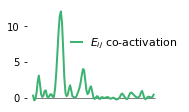

In [410]:
fig, ax = plt.subplots(figsize=(2.4,1.8))
ax.plot(analysis.go_edge(Trials['20'][0])[10:115,44],c='mediumseagreen',linewidth=2,label='$E_{ij}$ co-activation')
ax.hlines(0,0,105,color='k',linewidth=0.5)
ax.set_frame_on(0)
ax.set_xticks([])
ax.legend(handlelength=1,fontsize=11,frameon=False,loc='upper right', bbox_to_anchor=(1.2, 0.8))
#ax.set_yticks([])
plt.savefig('eseries.pdf')
plt.show()

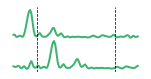

In [556]:
fig, ax = plt.subplots(figsize=(2.2,1.2))
ax.plot(analysis.go_edge(Trials['20'][0])[20:125,44]/4,c='mediumseagreen',linewidth=2,label='$E_{ij}$ co-activation')
ax.plot(analysis.go_edge(Trials['20'][0])[:105,44]/4-3.5,c='mediumseagreen',linewidth=2,label='$E_{ij}$ co-activation')
plt.axvline(20,color='k',linestyle='--',linewidth=0.75)
plt.axvline(85,color='k',linestyle='--',linewidth=0.75)
ax.set_frame_on(0)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig('e12series.pdf')
plt.show()

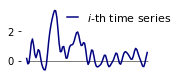

In [408]:
fig, ax = plt.subplots(figsize=(2.4,1.2))
ax.plot(gis[10:115,0],c='navy',label='$i$-th time series')
ax.hlines(0,0,105,color='k',linewidth=0.5)
ax.set_frame_on(0)
ax.set_xticks([])
ax.legend(handlelength=1,fontsize=11,frameon=False,loc='upper right', bbox_to_anchor=(1.2, 1.1))
#ax.set_yticks([])
plt.savefig('iseries.pdf')
plt.show()

In [401]:
params = {'fontsize': 10,
          'handlelength': 2}

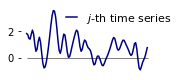

In [409]:
fig, ax = plt.subplots(figsize=(2.4,1.2))
ax.plot(gis[10:115,45],c='navy',label='$j$-th time series')
ax.hlines(0,0,105,color='k',linewidth=0.5)
ax.set_frame_on(0)
ax.set_xticks([])
ax.legend(handlelength=1,fontsize=11,frameon=False,loc='upper right', bbox_to_anchor=(1.2, 1.1))
#ax.set_yticks([])
plt.savefig('jseries.pdf')
plt.show()

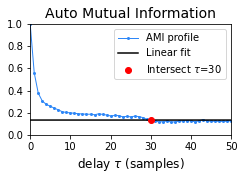

In [480]:
# Import cluster results
nedges=3003
taumax=128
AMI_edges = {};noready=[]
for i in range(44):
    AMI_edges['%d'%i]=np.zeros((10,taumax,nedges))
    for iw in range(10):
        if os.path.isfile(path_trials+'Sub%d'%i+'_Wind%d'%iw+'.npz'):
            AMI_edges['%d'%i][iw]=np.load(path_trials+'Sub%d'%i+'_Wind%d'%iw+'.npz')['EMIS']
        else:
            noready.append((i,iw))
            
p1=(0.,0.)
numero=AMI_edges['%d'%41][8][:,0]
denumero=np.max(numero)
y=numero/denumero
x2 = np.linspace(0, 127, 128)

# curve fit
opt1, pcov1 = curve_fit(model_func_lin, x2[30:], y[30:], p1)
a1, b1 = opt1
g=model_func_lin(x2, a1, b1)
idx = np.argwhere(y - g<0.005).flatten()
plt.figure(figsize=(3.5,2.6))
plt.title('Auto Mutual Information',fontsize=14)
plt.plot(x2,y,'.-',color=([0.1785, 0.5296, 0.9677]),linewidth=1,markersize=4,label='AMI profile')
plt.plot(x2,model_func_lin(x2, a1, b1),'k-',label='Linear fit')
plt.plot(x2[idx[0]],y[idx[0]], 'ro',label='Intersect $\\tau$=%d'%x2[idx[0]])
plt.ylim((0,1))
plt.xlim((0,50))
plt.xlabel('delay $\\tau$ (samples)',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.tight_layout()
#plt.savefig('AMIdecay.pdf')
plt.show()

In [17]:
# Edges={}
# for i in range(44):
#     Edges['%d'%i]=np.zeros((10,2560,3003))
#     for j in range(10):
#         Edges['%d'%i][j]=analysis.go_edge(Trials['%d'%i][j])

In [10]:
# x = np.linspace(0., 127., 128)
# x2 = np.linspace(0., 127., 128)
# p1=(0.,0.)
# def minima_ami_edges(ami, noreadi): #input AMI_edges and noready
#     minima_edges_single=np.zeros((44,10,nedges))
#     minima_edges_Single_int=np.zeros((44,10,nedges))
#     for i in range(44):
#         for j in range(10):
#             if (i,j) not in noreadi:  
#                 for ie in range(nedges):
#                     numero=ami['%d'%i][j][:,ie]
#                     denumero=np.max(ami['%d'%i][j][:,ie])
#                     y=numero/denumero
#                     # curve fit
#                     opt1, pcov1 = curve_fit(model_func_lin, x[30:], y[30:], p1)
#                     a1, b1 = opt1

#                     g=model_func_lin(x, a1, b1)
#                     idx = np.argwhere(y - g<0.005).flatten()

#                     minima_edges_single[i][j,ie]=x[idx[0]]
#                     minima_edges_Single_int[i][j,ie]=trapz(y[:int(x[idx[0]])], dx=1) 
#     return minima_edges_single, minima_edges_Single_int

In [15]:
# # Import cluster results
# nedges=3003
# taumax=128
# AMI_edges = {};AMI_edges_g = {};AMI_edges_p = {}
# noready=[];noready_g=[];noready_p=[]
# for i in range(44):
#     AMI_edges['%d'%i]=np.zeros((10,taumax,nedges))
#     AMI_edges_g['%d'%i]=np.zeros((10,taumax,nedges))
#     AMI_edges_p['%d'%i]=np.zeros((10,taumax,nedges))
#     for iw in range(10):
#         if os.path.isfile(path_trials+'Sub%d'%i+'_Wind%d'%iw+'.npz'):
#             AMI_edges['%d'%i][iw]=np.load(path_trials+'Sub%d'%i+'_Wind%d'%iw+'.npz')['EMIS']
#         else:
#             noready.append((i,iw))
#         if os.path.isfile(path_trials_surr_g+'Sub%d'%i+'_Wind%d'%iw+'.npz'):
#             AMI_edges_g['%d'%i][iw]=np.load(path_trials_surr_g+'Sub%d'%i+'_Wind%d'%iw+'.npz')['EMIS_surr']
#         else:
#             noready_g.append((i,iw))
#         if os.path.isfile(path_trials_surr_p+'Sub%d'%i+'_Wind%d'%iw+'.npz'):
#             AMI_edges_p['%d'%i][iw]=np.load(path_trials_surr_p+'Sub%d'%i+'_Wind%d'%iw+'.npz')['EMIS_surr']
#         else:
#             noready_p.append((i,iw))

In [ ]:
# x = np.linspace(0., 127., 128)
# x2 = np.linspace(0., 127., 128)
# p1=(0.,0.)
# def minima_ami_edges(ami, noreadi): #input AMI_edges and noready
#     minima_edges_single=np.zeros((44,10,nedges))
#     minima_edges_Single_int=np.zeros((44,10,nedges))
#     for i in range(44):
#         for j in range(10):
#             if (i,j) not in noreadi:  
#                 for ie in range(nedges):
#                     numero=ami['%d'%i][j][:,ie]
#                     denumero=np.max(ami['%d'%i][j][:,ie])
#                     y=numero/denumero
#                     # curve fit
#                     opt1, pcov1 = curve_fit(model_func_lin, x[30:], y[30:], p1)
#                     a1, b1 = opt1

#                     g=model_func_lin(x, a1, b1)
#                     idx = np.argwhere(y - g<0.005).flatten()

#                     minima_edges_single[i][j,ie]=x[idx[0]]

In [16]:
#minima_edges_Single, minima_edges_Single_int =minima_ami_edges(AMI_edges,noready)

In [17]:
#minima_edges_Single_g, minima_edges_Single_int_g=minima_ami_edges(AMI_edges_g,noready_g)

In [18]:
#minima_edges_Single_p, minima_edges_Single_int_p=minima_ami_edges(AMI_edges_p,noready_p)

In [19]:
#np.savez('/Users/giovanni/Documents/GitHub/fufo/data/Pierpaolo-MEG/AMI_minima.npz', minima_edges_Single=minima_edges_Single, minima_edges_Single_g=minima_edges_Single_g, minima_edges_Single_p=minima_edges_Single_p)
#np.savez('/Users/giovanni/Documents/GitHub/fufo/data/Pierpaolo-MEG/AMI_minima_int.npz', minima_edges_Single_int=minima_edges_Single_int, minima_edges_Single_int_g=minima_edges_Single_int_g, minima_edges_Single_int_p=minima_edges_Single_int_p)

### FIRST MINIMA OF AMI DECAY

In [12]:
mes=np.load('/Users/giovanni/Documents/GitHub/fufo/data/Pierpaolo-MEG/AMI_minima.npz')

In [13]:
minima_edges_Single=mes['minima_edges_Single']; minima_edges_Single_g=mes['minima_edges_Single_g']; minima_edges_Single_p=mes['minima_edges_Single_p']; 

In [13]:
#CORRECT ROIs

In [14]:
edglist2020=np.arange(3003)
fc2020=np.zeros((78,78))
fc2020[np.triu_indices(78,1)]=edglist2020
fc2020=fc2020+fc2020.T+100*np.identity(78)

fcirc=fc2020[np.ix_(tw20_to_circ,tw20_to_circ)]
edglistcirc=fcirc[np.triu_indices(78,1)].astype(int)

In [15]:
edgtw20_to_circ=np.zeros(3003).astype(int)
for i in range(3003):
    edgtw20_to_circ[i]=np.where(edglist2020==edglistcirc[i])[0] 

In [16]:
edgtonode2020={}
edgtonode_circ={}
for i in range(3003):
    edgtonode2020['%d'%i]=(np.where(fc2020==i)[0][0],np.where(fc2020==i)[0][1])
    edgtonode_circ['%d'%i]=(np.where(fcirc==i)[0][0],np.where(fcirc==i)[0][1])

In [17]:
fusi=[]
for i in range(3003):
    if edgtonode2020['%d'%i][0]==28:
        fusi.append(i)

In [18]:
minima_edges_Single=minima_edges_Single[:,:,edgtw20_to_circ]
minima_edges_Single_p=minima_edges_Single_p[:,:,edgtw20_to_circ]
minima_edges_Single_g=minima_edges_Single_g[:,:,edgtw20_to_circ]

# DEFINE EDGE SPECIFIC MEASURES

In [31]:
minima_collect=np.reshape(minima_edges_Single,(-1,3003))
minima_collect_p=np.reshape(minima_edges_Single_p,(-1,3003))
minima_collect_g=np.reshape(minima_edges_Single_g,(-1,3003))

In [32]:
order_subj=np.argsort(np.mean(np.mean(minima_edges_Single,axis=1),axis=1))

In [33]:
minima_collect_sorted_sub=np.reshape(minima_edges_Single[order_subj,:,:],(-1,3003))

In [34]:
# from scipy import io
# io.savemat('/Users/giovanni/Documents/GitHub/fufo/data/Pierpaolo-MEG/MinimaEdges-44sub-10tri-3003edg.mat', {'original':minima_edges_Single,'phase':minima_edges_Single_p,'gauss':minima_edges_Single_g})


In [35]:
order_tau=np.argsort(np.mean(minima_collect,axis=0))
# minima_sorted_tau=minima_collect[:,order_tau]
# order_tau_p=np.argsort(np.mean(minima_collect_p,axis=0))
# minima_sorted_tau_p=minima_collect_p[:,order_tau_p]
# order_tau_g=np.argsort(np.mean(minima_collect_g,axis=0))
# minima_sorted_tau_g=minima_collect_g[:,order_tau_g]
#order_rank=np.argsort(np.mean(minima_rank,axis=0))
#minima_sorted_rank=minima_rank[:,order_rank]

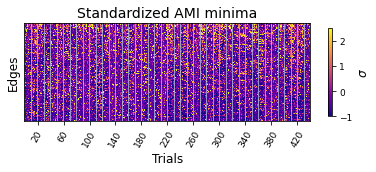

In [302]:
# Let us plot the matrix of the minima
plt.figure(figsize=(5.5,2.5))
plt.title('Standardized AMI minima',fontsize=14)
plt.imshow(stats.zscore(minima_collect[:,order_tau],axis=1)[:,::-1].T,cmap='plasma',interpolation='nearest',aspect='auto',vmin=-1.,vmax=2.5)
cbar=plt.colorbar(shrink=0.9)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('$\sigma$',fontsize=12)
#plt.yticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=0,fontsize=16)
#plt.xticks(np.arange(5,440)[::10],['Sub %d'%i for i in range(44)], rotation=60,fontsize=16)
for i in range(44):
    plt.axvline(10*i-0.5,linewidth=0.75,color='lightsteelblue')
plt.ylabel('Edges',fontsize=12)
plt.xlabel('Trials',fontsize=12)
plt.xticks(10*np.arange(44)[::4]+20,fontsize=9,rotation=60)
plt.yticks([])
plt.tight_layout()
plt.savefig('AMIminima_trials.pdf') 
plt.show()

In [26]:
nedges=3003

In [39]:
tks=np.array([ 9,19,  60, 108, 145, 188, 226, 260, 305, 349, 384, 432])
pal = sns.color_palette(n_colors=1)
df = pd.DataFrame(
    { 
        'group': list(itertools.chain(*[['group%d'%i]*nedges for i in range(len(tks))])),
        'AMI minima': list(itertools.chain(*[list(minima_collect[tks][i]) for i in range(len(tks))]))
    }
) 

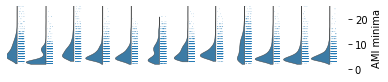

In [1135]:
f, ax = plt.subplots(figsize=(5.5, 1.25))
ax2 = ax.twinx()
ax2.set_ylim(0,25)

ax2=pt.half_violinplot( x = 'group', y = 'AMI minima', data = df, palette = pal, bw = .25, cut = 0., alpha = .95,
                      scale = "area", width = 1.4, inner = None,linewidth=0.5)
ax2=sns.stripplot(x = 'group', y = 'AMI minima', data = df, palette =pal, edgecolor = "white",
                 size = 0.45, jitter = 1, zorder = 0)

ax.axis('off')
ax2.set_frame_on(False)

plt.tight_layout()
#plt.savefig('AMI_minima_trial_distr.png', dpi=1000) 
plt.show()

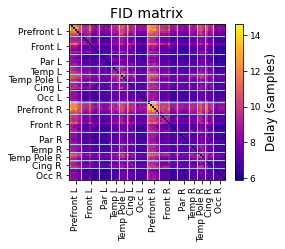

In [134]:
# FID matrix in trial
tri = np.zeros((78, 78))
tri[np.triu_indices(78, 1)] = np.mean(np.mean(minima_edges_Single,axis=1),axis=0)
MiniMat_circle=tri+tri.T

# Let us plot the matrix of the minima
plt.figure(figsize=(4,4))
plt.title('FID matrix',fontsize=14)
plt.imshow(MiniMat_circle,cmap='plasma',interpolation='nearest',vmin=np.sort(np.unique(MiniMat_circle))[1]);
cbar=plt.colorbar(shrink=0.7)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('Delay (samples)',fontsize=12)
plt.yticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=0,fontsize=9)
plt.xticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=90,fontsize=9)

for i in list(lobes_intervals.values())[:-1]:
    plt.axhline(i-0.5,linewidth=1,color='lightsteelblue')
    plt.axvline(i-0.5,linewidth=1,color='lightsteelblue')
plt.tight_layout()
#plt.savefig('FID_mean.pdf') 
plt.show()

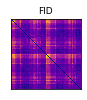

In [82]:
# FID matrix in trial

# Let us plot the matrix of the minima
plt.figure(figsize=(1.5,1.5))
plt.title('FID',fontsize=9)
plt.imshow(MiniMat_circle,cmap='plasma',interpolation='nearest',vmin=np.sort(np.unique(MiniMat_circle))[1]);

plt.yticks([])
plt.xticks([])

plt.tight_layout()
plt.savefig('FID_mean2.pdf') 
plt.show()

In [686]:
np.save('mmacoltor',minima_collect)

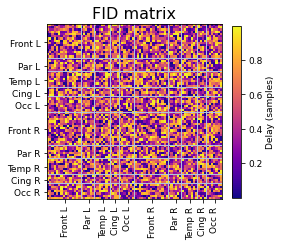

In [1588]:
# FID matrix in trial
# Let us plot the matrix of the minima
plt.figure(figsize=(4,4))
plt.title('FID matrix',fontsize=16)
plt.imshow(np.random.rand(78,78),cmap='plasma',interpolation='nearest');
cbar=plt.colorbar(shrink=0.7)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('Delay (samples)',fontsize=9)
plt.yticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=0,fontsize=9)
plt.xticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=90,fontsize=9)

for i in list(lobes_intervals.values())[:-1]:
    plt.axhline(i-0.5,linewidth=1,color='lightsteelblue')
    plt.axvline(i-0.5,linewidth=1,color='lightsteelblue')
plt.tight_layout()
#plt.savefig('Random_fid.pdf') 
plt.show()

# FUN - SUN - MSC

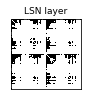

In [136]:
# FID matrix in trial
# Let us plot the matrix of the minima
plt.figure(figsize=(1.5,1.5))
plt.title('LSN layer',fontsize=9)
sun=np.where(MiniMat_circle>np.percentile(MiniMat_circle,85),1,0)
plt.imshow(sun,cmap='Greys',interpolation='nearest');
plt.yticks([])
plt.xticks([])
plt.tight_layout()
#plt.savefig('SUN_layer.pdf') 
plt.show()

In [137]:
# FID matrix in trial
# Let us plot the matrix of the minima
plt.figure(figsize=(0.45,1.5))
ksun=np.sum(sun,axis=0)
plt.imshow(np.expand_dims(ksun,1),cmap='Greys',interpolation='nearest',aspect='auto');
plt.yticks([])
plt.xticks([])
plt.tight_layout()
#plt.savefig('SUN_degree.pdf') 
plt.show()

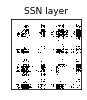

In [138]:
# FID matrix in trial
# Let us plot the matrix of the minima
plt.figure(figsize=(1.5,1.5))
plt.title('SSN layer',fontsize=9)
fun=np.where(MiniMat_circle<np.percentile(MiniMat_circle,15),1,0)-np.identity(78)
plt.imshow(fun,cmap='Greys',interpolation='nearest');
plt.yticks([])
plt.xticks([])
plt.tight_layout()
#plt.savefig('FUN_layer.pdf') 
plt.show()

In [139]:
# FID matrix in trial
# Let us plot the matrix of the minima
plt.figure(figsize=(0.45,1.5))
kfun=np.sum(fun,axis=0)
plt.imshow(np.expand_dims(kfun,1),cmap='Greys',interpolation='nearest',aspect='auto');
plt.yticks([])
plt.xticks([])
plt.tight_layout()
#plt.savefig('FUN_degree.pdf') 
plt.show()

In [55]:
# MSC from mean
msc=np.arange(78,dtype=float)
for i in range(78):
    msc[i]=(4*kfun[i]*ksun[i])/(kfun[i]+ksun[i])**2
    #msc[i]=(ksun[i]-kfun[i])/(kfun[i]+ksun[i])
plt.figure(figsize=(0.5,1.75))
plt.imshow(np.expand_dims(msc,1),cmap='bwr',interpolation='nearest',aspect='auto',vmin=-1,vmax=1);
plt.yticks([])
plt.xticks([])
plt.tight_layout()
#plt.savefig('MSCsing.pdf') 
plt.show()

# Percolation in trials

In [56]:
# AVERAGE ACROSS TRIALS
FUN=np.zeros((100,78,78),dtype=float);SUN=np.zeros((100,78,78),dtype=float);MSC=np.zeros((100,78),dtype=float)
for ii, i in enumerate(np.linspace(12,90,100)):
    FUN[ii,:,:]=np.where(MiniMat_circle<np.percentile(MiniMat_circle,i),1,0)-np.identity(78)
    SUN[ii,:,:]=np.where(MiniMat_circle>np.percentile(MiniMat_circle,100-i),1,0)
    kfun=np.sum(FUN[ii,:,:],axis=0)
    ksun=np.sum(SUN[ii,:,:],axis=0)
    for j in range(78):
        MSC[ii,j]=(ksun[j]-kfun[j])/(kfun[j]+ksun[j])#(4*kfun[j]*ksun[j])/(kfun[j]+ksun[j])**2
# tri = np.zeros((78, 78))
# tri[np.triu_indices(78, 1)] = np.mean(np.mean(minima_edges_Single_p,axis=1),axis=0)
# MiniMat_circle_p=tri+tri.T

# FUN_p=np.zeros((100,78,78),dtype=float);SUN_p=np.zeros((100,78,78),dtype=float);MSC_p=np.zeros((100,78),dtype=float)
# for ii, i in enumerate(np.linspace(12,90,100)):
#     FUN_p[ii,:,:]=np.where(MiniMat_circle_p<np.percentile(MiniMat_circle_p,i),1,0)-np.identity(78)
#     SUN_p[ii,:,:]=np.where(MiniMat_circle_p>np.percentile(MiniMat_circle_p,100-i),1,0)
#     kfun=np.sum(FUN_p[ii,:,:],axis=0)
#     ksun=np.sum(SUN_p[ii,:,:],axis=0)
#     for j in range(78):
#         MSC_p[ii,j]=(4*kfun[j]*ksun[j])/(kfun[j]+ksun[j])**2
#order=np.argsort(np.sum(MSC,axis=0))

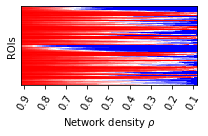

In [57]:
# Let us plot the matrix of the minima
plt.figure(figsize=(3.,2.))
plt.imshow(MSC[::-1,:].T,cmap='bwr',aspect='auto',interpolation='nearest')
# cbar=plt.colorbar(shrink=0.9, orientation="horizontal")
# cbar.ax.tick_params(labelsize=9)
# cbar.set_label('MPC',fontsize=12)
plt.yticks([])
plt.xticks(np.arange(100)[::12]+1,np.asarray([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]),rotation=60)
plt.xlabel('Network density $\\rho$')
plt.ylabel('ROIs')
plt.tight_layout()
#plt.savefig('MSCsingle2.pdf') 
plt.show()

In [26]:
nedges=3003
#MSM matrix in SINGLE TRIALS
MSS=np.zeros((440,nregions))
for it in range(440):
    tri = np.zeros((78, 78))
    tri[np.triu_indices(78, 1)] = np.reshape(minima_edges_Single,(-1,nedges))[it]
    MiniMat_circle=tri+tri.T

    FUF=np.zeros((100,78,78),dtype=float);SUS=np.zeros((100,78,78),dtype=float);MSM=np.zeros((100,78),dtype=float)
    for ii, i in enumerate(np.linspace(30,80,100)):
        FUF[ii,:,:]=np.where(MiniMat_circle<np.percentile(MiniMat_circle,i),1,0)-np.identity(78)
        SUS[ii,:,:]=np.where(MiniMat_circle>np.percentile(MiniMat_circle,100-i),1,0)
        kfun=np.sum(FUF[ii,:,:],axis=0)
        ksun=np.sum(SUS[ii,:,:],axis=0)
        for j in range(78):
            if (ksun[j]!=0)&(kfun[j]!=0):
                MSM[ii,j]=(ksun[j]-kfun[j])/(kfun[j]+ksun[j])
            
    MSS[it]=np.mean(MSM,axis=0)

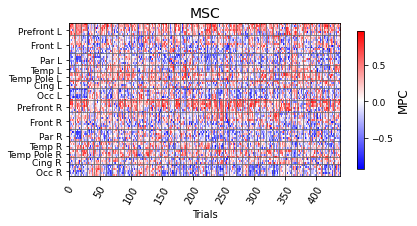

In [27]:
# Let us plot the matrix of the minima
plt.figure(figsize=(6.,3.25))
plt.title('MSC',fontsize=14)
plt.imshow(MSS.T,cmap='bwr',aspect='auto',interpolation='nearest')
cbar=plt.colorbar(shrink=0.9)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('MPC',fontsize=12)
plt.xticks(rotation=60)
plt.xlabel('Trials')
#plt.ylabel('ROIs')
plt.yticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=0,fontsize=9)
plt.tight_layout()
for i in list(lobes_intervals.values())[:-1]:
    plt.axhline(i-0.5,linewidth=0.75,color='dimgrey')
for i in range(44):
    plt.axvline(10*i-0.5,linewidth=0.75,color='dimgrey')
#plt.savefig('MSCall.pdf') 
plt.show()

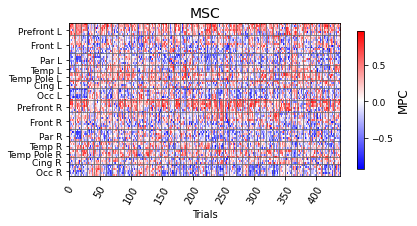

In [386]:
# Let us plot the matrix of the minima
plt.figure(figsize=(6.,3.25))
plt.title('MSC',fontsize=14)
plt.imshow(MSS.T,cmap='bwr',aspect='auto',interpolation='nearest')
cbar=plt.colorbar(shrink=0.9)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('MPC',fontsize=12)
plt.xticks(rotation=60)
plt.xlabel('Trials')
#plt.ylabel('ROIs')
plt.yticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=0,fontsize=9)
plt.tight_layout()
for i in list(lobes_intervals.values())[:-1]:
    plt.axhline(i-0.5,linewidth=0.75,color='dimgrey')
for i in range(44):
    plt.axvline(10*i-0.5,linewidth=0.75,color='dimgrey')
plt.savefig('MSCall.pdf') 
plt.show()

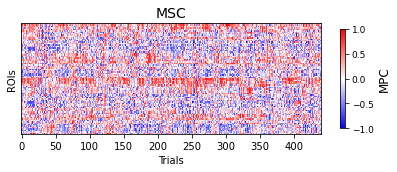

In [307]:
# Let us plot the matrix of the minima
plt.figure(figsize=(5.75,2.5))
plt.title('MSC',fontsize=14)
plt.imshow(MSS.T,cmap='bwr',aspect='auto',interpolation='nearest')
cbar=plt.colorbar(shrink=0.9)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('MPC',fontsize=12)
plt.yticks([])
plt.xlabel('Trials')
plt.ylabel('ROIs')
plt.tight_layout()
plt.savefig('MSC.pdf') 
plt.show()

In [115]:
MSS.shape

(440, 78)

In [48]:
# FID matrix in trial
# Let us plot the matrix of the minima
plt.figure(figsize=(0.45,1.5))
km=np.mean(MSS,axis=0)
plt.imshow(np.expand_dims(km,1),cmap='bwr',interpolation='nearest',aspect='auto',vmin=-1,vmax=1);
plt.yticks([])
plt.xticks([])
plt.tight_layout()
#plt.savefig('MSCall_mean.pdf') 
plt.show()

In [60]:
# FID matrix in trial
# Let us plot the matrix of the minima
plt.figure(figsize=(0.45,1.5))
plt.imshow(np.expand_dims(KM,1),cmap='bwr',interpolation='nearest',aspect='auto',vmin=0,vmax=1);
plt.yticks([])
plt.xticks([])
plt.tight_layout()
#plt.savefig('MSCall_mean.pdf') 
plt.show()

In [58]:
KM=np.mean(MSC,axis=0)


In [61]:
KM

array([0.07772319, 0.28309807, 0.27780104, 0.27586778, 0.48920859,
       0.66929555, 0.96689036, 0.95693622, 0.93235374, 0.99739415,
       0.52567585, 0.84387559, 0.74862971, 0.58759102, 0.99460563,
       0.49171023, 0.64477865, 0.51507303, 0.7295616 , 0.54331729,
       0.91552717, 0.97557533, 0.93101063, 0.9933698 , 0.73458484,
       0.64510716, 0.4484591 , 0.61285074, 0.88584968, 0.39740807,
       0.9894154 , 0.91569371, 0.98360144, 0.53432052, 0.61174452,
       0.77887201, 0.64826524, 0.61495412, 0.8871552 , 0.08630818,
       0.23818576, 0.18625509, 0.2103446 , 0.33188479, 0.45027376,
       0.97882345, 0.89578008, 0.96266299, 0.89401162, 0.48818365,
       0.70406911, 0.72352533, 0.72675242, 0.99373865, 0.7416911 ,
       0.67611931, 0.74657331, 0.58973714, 0.59050578, 0.91554773,
       0.9924586 , 0.95175544, 0.91035019, 0.93459178, 0.74947841,
       0.44217584, 0.57524153, 0.94264509, 0.42186469, 0.95126126,
       0.93748485, 0.79951686, 0.48791688, 0.4191736 , 0.62636

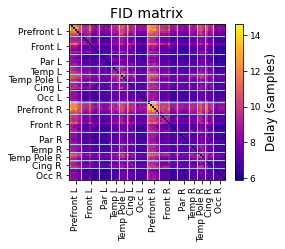

In [62]:
# FID matrix in trial
tri = np.zeros((78, 78))
tri[np.triu_indices(78, 1)] = np.mean(np.mean(minima_edges_Single,axis=1),axis=0)
MiniMat_circle=tri+tri.T

# Let us plot the matrix of the minima
plt.figure(figsize=(4,4))
plt.title('FID matrix',fontsize=14)
plt.imshow(MiniMat_circle,cmap='plasma',interpolation='nearest',vmin=np.sort(np.unique(MiniMat_circle))[1]);
cbar=plt.colorbar(shrink=0.7)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('Delay (samples)',fontsize=12)
plt.yticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=0,fontsize=9)
plt.xticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=90,fontsize=9)

for i in list(lobes_intervals.values())[:-1]:
    plt.axhline(i-0.5,linewidth=1,color='lightsteelblue')
    plt.axvline(i-0.5,linewidth=1,color='lightsteelblue')
plt.tight_layout()
plt.show()

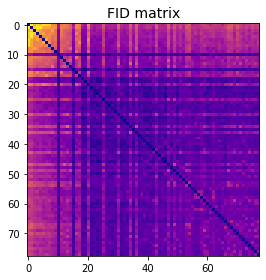

In [63]:
order=np.argsort(KM)
# Let us plot the matrix of the minima
plt.figure(figsize=(4,4))
plt.title('FID matrix',fontsize=14)
plt.imshow(MiniMat_circle[np.ix_(order,order)],cmap='plasma',interpolation='nearest',vmin=np.sort(np.unique(MiniMat_circle))[1]);

plt.tight_layout()
plt.show()

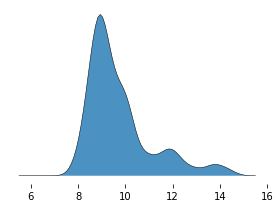

In [80]:
f, ax = plt.subplots(figsize=(4., 3.))

density = stats.kde.gaussian_kde(MiniMat_circle[np.ix_(order,order)][3],0.2)
x = np.linspace(5.5,15.5,100)

plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
plt.show()

In [150]:
order=np.argsort(KM)

distri=np.zeros((nregions,200))
x = np.linspace(5.5,15.5,200)
for i in range(nregions):
    density = stats.kde.gaussian_kde(np.delete(MiniMat_circle[np.ix_(order,order)][i],i),0.3)
    distri[i]=density(x)

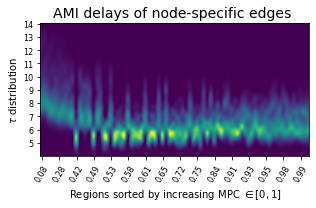

In [171]:
# Let us plot the matrix of the minima
plt.figure(figsize=(4.5,3))
plt.title('AMI delays of node-specific edges ',fontsize=14)
plt.imshow(distri[:,::-1].T,cmap='viridis',interpolation='spline36',aspect='auto');
plt.xticks(np.arange(nregions)[::5],np.round(np.sort(KM),2)[::5],rotation=60,fontsize=8)
plt.yticks(np.arange(200)[::20],np.linspace(5.5,15.5,200)[::20][::-1].astype(int),fontsize=8)
plt.ylabel('$\\tau$ distribution')
plt.xlabel('Regions sorted by increasing MPC $\in [0,1]$')
plt.tight_layout()
#plt.savefig('Node_taus.pdf')
plt.show()

In [40]:
np.delete(MiniMat_circle[np.ix_(order,order)][0],0)

array([6.99772727, 6.72045455, 6.6       , 5.93409091, 7.10227273,
       5.87045455, 6.22954545, 7.11818182, 6.95227273, 6.24318182,
       6.14545455, 6.87045455, 6.32954545, 6.35454545, 6.23409091,
       6.56363636, 6.32954545, 6.81818182, 6.66818182, 7.275     ,
       6.475     , 6.3       , 6.80454545, 6.29318182, 6.9       ,
       7.275     , 6.46363636, 6.55227273, 6.72272727, 6.76136364,
       6.83863636, 6.74318182, 6.59545455, 6.51136364, 7.16590909,
       6.725     , 7.31590909, 6.72727273, 6.85227273, 6.93409091,
       7.13409091, 6.91363636, 7.09772727, 6.93409091, 6.57727273,
       6.975     , 6.82954545, 7.3       , 7.30681818, 6.525     ,
       6.89545455, 6.76818182, 7.61818182, 6.52045455, 7.175     ,
       7.775     , 7.07272727, 7.56818182, 7.11590909, 7.41136364,
       7.63636364, 7.18636364, 7.15454545, 7.71363636, 7.35227273,
       7.96136364, 7.49772727, 7.65454545, 7.51363636, 7.89545455,
       8.14090909, 8.09090909, 8.175     , 8.05227273, 8.18409

In [27]:
# for i in range(78):
#     print(np.sort(km)[i],np.asarray(AAL.SC_labels)[np.argsort(km)][i])

# AMI decay versus standard measures

### MEASURES ON EDGE CO-ACTIVATION SIGNALS

In [28]:
# #correlation values of edges
# corre=np.zeros((44,10,3003))
# corre_p=np.zeros((44,10,3003))
# corre_g=np.zeros((44,10,3003))

# #Mean Gradient  of edges
# grade=np.zeros((44,10,3003))
# grade_p=np.zeros((44,10,3003))
# grade_g=np.zeros((44,10,3003))
# #Gradient of positive co-activations
# upgrade=np.zeros((44,10,3003))
# upgrade_p=np.zeros((44,10,3003))
# upgrade_g=np.zeros((44,10,3003))
# #Gradient of negative co-activations
# dgrade=np.zeros((44,10,3003))
# dgrade_p=np.zeros((44,10,3003))
# dgrade_g=np.zeros((44,10,3003))
# #Absolute value Gradient of edges
# abrade=np.zeros((44,10,3003))
# abrade_p=np.zeros((44,10,3003))
# abrade_g=np.zeros((44,10,3003))
# for i in range(44):
#     for j in range(10):
#         edg=analysis.go_edge(Trials['%d'%i][j])
#         corre[i,j,:]=np.mean(edg,axis=0)
#         grade[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)
#         upgrade[i,j,:]=np.mean(np.gradient(np.where(edg>0,edg,0),axis=0),axis=0)
#         dgrade[i,j,:]=np.mean(np.gradient(np.where(edg<0,edg,0),axis=0),axis=0)
#         abrade[i,j,:]=np.mean(np.abs(np.gradient(edg,axis=0)),axis=0)
        
#         edg=analysis.go_edge(Trials_p['%d'%i][j])
#         corre_p[i,j,:]=np.mean(edg,axis=0)
#         grade_p[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)
#         upgrade_p[i,j,:]=np.mean(np.gradient(np.where(edg>0,edg,0),axis=0),axis=0)
#         dgrade_p[i,j,:]=np.mean(np.gradient(np.where(edg<0,edg,0),axis=0),axis=0)
#         abrade_p[i,j,:]=np.mean(np.abs(np.gradient(edg,axis=0)),axis=0)
        
#         edg=analysis.go_edge(Trials_g['%d'%i][j])
#         corre_g[i,j,:]=np.mean(edg,axis=0)
#         grade_g[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)
#         upgrade_g[i,j,:]=np.mean(np.gradient(np.where(edg>0,edg,0),axis=0),axis=0)
#         dgrade_g[i,j,:]=np.mean(np.gradient(np.where(edg<0,edg,0),axis=0),axis=0)
#         abrade_g[i,j,:]=np.mean(np.abs(np.gradient(edg,axis=0)),axis=0)


In [30]:
mm=np.mean(np.mean(corre,axis=1),axis=0)
mm_p=np.mean(np.mean(corre_p,axis=1),axis=0)
mm_g=np.mean(np.mean(corre_g,axis=1),axis=0)

mg=np.mean(np.mean(grade,axis=1),axis=0)
mg_p=np.mean(np.mean(grade_p,axis=1),axis=0)
mg_g=np.mean(np.mean(grade_g,axis=1),axis=0)

mab=np.mean(np.mean(abrade,axis=1),axis=0)
mab_p=np.mean(np.mean(abrade_p,axis=1),axis=0)
mab_g=np.mean(np.mean(abrade_g,axis=1),axis=0)

mug=np.mean(np.mean(upgrade,axis=1),axis=0)
mug_p=np.mean(np.mean(upgrade_p,axis=1),axis=0)
mug_g=np.mean(np.mean(upgrade_g,axis=1),axis=0)
dg=np.mean(np.mean(dgrade,axis=1),axis=0)
dg_p=np.mean(np.mean(dgrade_p,axis=1),axis=0)
dg_g=np.mean(np.mean(dgrade_g,axis=1),axis=0)

In [61]:
#Mean Gradient  of edges
vgrade=np.zeros((44,10,3003))
vgrade_p=np.zeros((44,10,3003))
vgrade_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        vgrade[i,j,:]=np.var(np.gradient(edg,axis=0),axis=0)
        
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        vgrade_p[i,j,:]=np.var(np.gradient(edg,axis=0),axis=0)

        edg=analysis.go_edge(Trials_g['%d'%i][j])
        vgrade_g[i,j,:]=np.var(np.gradient(edg,axis=0),axis=0)

In [204]:
#Mean Gradient  of edges
locgrade=np.zeros((44,10,3003))
locgrade_p=np.zeros((44,10,3003))
locgrade_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        locgrade[i,j,:]=np.mean(np.gradient(edg[:2100],axis=0),axis=0)
        
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        locgrade_p[i,j,:]=np.mean(np.gradient(edg[:2100],axis=0),axis=0)

        edg=analysis.go_edge(Trials_g['%d'%i][j])
        locgrade_g[i,j,:]=np.mean(np.gradient(edg[:2100],axis=0),axis=0)

In [214]:
#Mean Gradient  of edges
locgrade=np.zeros((44,10,3003))
locgrade_p=np.zeros((44,10,3003))
locgrade_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        dynmean=np.zeros((64,3003))
        for k in range(64):
            dynmean[k]=np.var(edg[k*40:k*40+40,:],axis=0)            
        locgrade[i,j,:]=np.mean(dynmean,axis=0)
        
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        dynmean=np.zeros((64,3003))
        for k in range(64):
            dynmean[k]=np.var(edg[k*40:k*40+40,:],axis=0)  
        locgrade_p[i,j,:]=np.mean(dynmean,axis=0)
        
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        dynmean=np.zeros((64,3003))
        for k in range(64):
            dynmean[k]=np.var(edg[k*40:k*40+40,:],axis=0)            
        locgrade_g[i,j,:]=np.mean(dynmean,axis=0)

In [184]:
len(edg)

2560

In [215]:
log=np.mean(np.mean(locgrade,axis=1),axis=0)
log_p=np.mean(np.mean(locgrade_p,axis=1),axis=0)
log_g=np.mean(np.mean(locgrade_g,axis=1),axis=0)

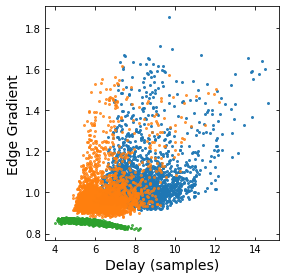

In [216]:
# the random data
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(5, 5))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
# ax_histx = plt.axes(rect_histx)
# ax_histx.tick_params(direction='in', labelbottom=False)
# ax_histy = plt.axes(rect_histy)
# ax_histy.tick_params(direction='in', labelleft=False)
# ax_histx.set_frame_on(False)
# ax_histy.set_frame_on(False)

# the scatter plot:
ax_scatter.scatter(mean_tau,log,s=4,alpha=0.9)
ax_scatter.scatter(mean_tau_p,log_p,s=4,alpha=0.75);
ax_scatter.scatter(mean_tau_g,log_g,s=4,alpha=0.75);

ax_scatter.set_xlabel('Delay (samples)',fontsize=14);ax_scatter.set_ylabel('Edge Gradient',fontsize=14)
#plt.savefig('scattergrad.pdf',bbox_inches='tight')
plt.show()

In [212]:
lboot_decay_lenburst=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    lboot_decay_lenburst[i,0],lboot_decay_lenburst[i,1]=stats.spearmanr(mean_tau[orde],log[orde])
lboot_decay_lenburst_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    lboot_decay_lenburst_p[i,0],lboot_decay_lenburst_p[i,1]=stats.spearmanr(mean_tau_p[orde],log_p[orde])
lboot_decay_lenburst_g=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    lboot_decay_lenburst_g[i,0],lboot_decay_lenburst_g[i,1]=stats.spearmanr(mean_tau_g[orde],log_g[orde])

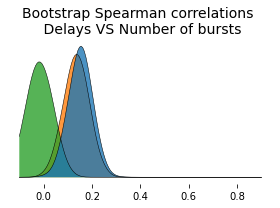

In [213]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Bootstrap Spearman correlations \n Delays VS Number of bursts', fontsize=14)
density = stats.kde.gaussian_kde(lboot_decay_lenburst[:,0],0.5)
density_p = stats.kde.gaussian_kde(lboot_decay_lenburst_p[:,0],0.5)
density_g = stats.kde.gaussian_kde(lboot_decay_lenburst_g[:,0],0.5)
x = np.linspace(-0.1,0.9,150)

plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.8)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='Gauss surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.8)
plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
plt.show()

In [62]:
vg=np.mean(np.mean(vgrade,axis=1),axis=0)
vg_p=np.mean(np.mean(vgrade_p,axis=1),axis=0)
vg_g=np.mean(np.mean(vgrade_g,axis=1),axis=0)

In [76]:
#Mean Gradient  of edges
diffe=np.zeros((44,10,3003))
diffe_p=np.zeros((44,10,3003))
diffe_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        diffe[i,j,:]=np.mean(np.diff(edg,axis=0),axis=0)
        
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        diffe_p[i,j,:]=np.mean(np.diff(edg,axis=0),axis=0)

        edg=analysis.go_edge(Trials_g['%d'%i][j])
        diffe_g[i,j,:]=np.mean(np.diff(edg,axis=0),axis=0)

### WIDTH OF INTER-EVENT INTERVAL DISTRIBUTION

In [41]:
def intervals(a):
    # Create an array of how long are all the intervals (zero sequences).
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return list(np.diff(ranges).flatten())

In [43]:
IET={}
IET_p={}
IET_g={}
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        edg_bin=np.where(np.abs(edg)>4,1,0) #np.percentile(edg,90) np.percentile(np.abs(edg),95)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        edg_bin_p=np.where(np.abs(edg)>4,1,0)        
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        edg_bin_g=np.where(np.abs(edg)>4,1,0)
        for k in range(3003):
            # Intervals size for edge k subject i trial j
            IET[(i,j,k)]=intervals(edg_bin[:,k])
            IET_p[(i,j,k)]=intervals(edg_bin_p[:,k])
            IET_g[(i,j,k)]=intervals(edg_bin_g[:,k])

In [765]:
# EIET={}
# EIET_p={}
# EIET_g={}
# for i in range(44):
#     for j in range(10):
#         edg=analysis.go_edge(Trials['%d'%i][j])
#         edg_p=analysis.go_edge(Trials_p['%d'%i][j])
#         edg_g=analysis.go_edge(Trials_g['%d'%i][j])
#         for k in range(3003):
#             # Intervals size for edge k subject i trial j
#             EIET[(i,j,k)]=intervals(np.where(np.abs(edg[:,k])>np.percentile(np.abs(edg[:,k]),95),1,0))
#             EIET_p[(i,j,k)]=intervals(np.where(np.abs(edg_p[:,k])>np.percentile(np.abs(edg_p[:,k]),95),1,0))
#             EIET_g[(i,j,k)]=intervals(np.where(np.abs(edg_g[:,k])>np.percentile(np.abs(edg_g[:,k]),95),1,0))

In [522]:
# ZIET={}
# ZIET_p={}
# ZIET_g={}
# for i in range(44):
#     for j in range(10):
#         edg=analysis.go_edge(Trials['%d'%i][j])
#         edg_bin=np.where(np.abs(edg)>np.percentile(np.abs(edg),95),1,0) #np.percentile(edg,90)
#         edg=analysis.go_edge(Trials_p['%d'%i][j])
#         edg_bin_p=np.where(np.abs(edg)>np.percentile(np.abs(edg),95),1,0)        
#         edg=analysis.go_edge(Trials_g['%d'%i][j])
#         edg_bin_g=np.where(np.abs(edg)>np.percentile(np.abs(edg),95),1,0)
#         for k in range(3003):
#             # Intervals size for edge k subject i trial j
#             ZIET[(i,j,k)]=pks(edg_bin[:,k])
#             ZIET_p[(i,j,k)]=pks(edg_bin_p[:,k])
#             ZIET_g[(i,j,k)]=pks(edg_bin_g[:,k])

In [523]:
# numburst=np.zeros(3003)
# numburst_p=np.zeros(3003)
# numburst_g=np.zeros(3003)
# lenburst=np.zeros(3003)
# lenburst_p=np.zeros(3003)
# lenburst_g=np.zeros(3003)
# for k in range(3003):
#     ie=[];ie_p=[];ie_g=[]  
#     for i in range(44):
#         for j in range(10):
#             ie.extend(ZIET[(i,j,k)])
#             ie_p.extend(ZIET_p[(i,j,k)])
#             ie_g.extend(ZIET_g[(i,j,k)])
#     numburst[k]=len(ie)
#     numburst_p[k]=len(ie_p)
#     numburst_g[k]=len(ie_g)
#     lenburst[k]=np.mean(ie)
#     lenburst_p[k]=np.mean(ie_p)
#     lenburst_g[k]=np.mean(ie_g)

In [44]:
i_width=np.zeros(3003)
i_width_p=np.zeros(3003)
i_width_g=np.zeros(3003)
for k in range(3003):
    ie=[];ie_p=[];ie_g=[]  
    for i in range(44):
        for j in range(10):
            if len(IET[(i,j,k)][1:-1])>3:
                ie.extend(IET[(i,j,k)])
            if len(IET_p[(i,j,k)][1:-1])>3:
                ie_p.extend(IET_p[(i,j,k)])
            if len(IET_g[(i,j,k)][1:-1])>3:
                ie_g.extend(IET_g[(i,j,k)])
    i_width[k]=len(ie)
    i_width_p[k]=len(ie_p)
    i_width_g[k]=len(ie_g)
#     i_width[k]=np.max(ie)-np.min(ie)
#     i_width_p[k]=np.max(ie_p)-np.min(ie_p)
#     i_width_g[k]=np.max(ie_g)-np.min(ie_g)

In [45]:
m_width=np.zeros(3003)
m_width_p=np.zeros(3003)
m_width_g=np.zeros(3003)
for k in range(3003):
    ie=[];ie_p=[];ie_g=[]  
    for i in range(44):
        for j in range(10):
            if len(IET[(i,j,k)][1:-1])>3:
                ie.extend(IET[(i,j,k)])
            if len(IET_p[(i,j,k)][1:-1])>3:
                ie_p.extend(IET_p[(i,j,k)])
            if len(IET_g[(i,j,k)][1:-1])>3:
                ie_g.extend(IET_g[(i,j,k)])
    m_width[k]=np.mean(ie)
    m_width_p[k]=np.mean(ie_p)
    m_width_g[k]=np.mean(ie_g)
#     i_width[k]=np.max(ie)-np.min(ie)
#     i_width_p[k]=np.max(ie_p)-np.min(ie_p)
#     i_width_g[k]=np.max(ie_g)-np.min(ie_g)

In [46]:
v_width=np.zeros(3003)
v_width_p=np.zeros(3003)
v_width_g=np.zeros(3003)
for k in range(3003):
    ie=[];ie_p=[];ie_g=[]  
    for i in range(44):
        for j in range(10):
            if len(IET[(i,j,k)][1:-1])>3:
                ie.extend(IET[(i,j,k)])
            if len(IET_p[(i,j,k)][1:-1])>3:
                ie_p.extend(IET_p[(i,j,k)])
            if len(IET_g[(i,j,k)][1:-1])>3:
                ie_g.extend(IET_g[(i,j,k)])
    v_width[k]=np.var(ie)
    v_width_p[k]=np.var(ie_p)
    v_width_g[k]=np.var(ie_g)
#     i_width[k]=np.max(ie)-np.min(ie)
#     i_width_p[k]=np.max(ie_p)-np.min(ie_p)
#     i_width_g[k]=np.max(ie_g)-np.min(ie_g)

In [768]:
# e_width=np.zeros(3003)
# e_width_p=np.zeros(3003)
# e_width_g=np.zeros(3003)
# for k in range(3003):
#     ie=[];ie_p=[];ie_g=[]  
#     for i in range(44):
#         for j in range(10):
#             if len(EIET[(i,j,k)][1:-1])>3:
#                 ie.extend(EIET[(i,j,k)])
#             if len(EIET_p[(i,j,k)][1:-1])>3:
#                 ie_p.extend(EIET_p[(i,j,k)])
#             if len(EIET_g[(i,j,k)][1:-1])>3:
#                 ie_g.extend(EIET_g[(i,j,k)])
#     e_width[k]=len(ie)
#     e_width_p[k]=len(ie_p)
#     e_width_g[k]=len(ie_g)
# #     i_width[k]=np.max(ie)-np.min(ie)
# #     i_width_p[k]=np.max(ie_p)-np.min(ie_p)
# #     i_width_g[k]=np.max(ie_g)-np.min(ie_g)

In [517]:
def pks(a):
    # Create an array of how long are all the intervals (zero sequences).
    iszero = np.concatenate(([0], np.equal(a, 1).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return list(np.diff(ranges).flatten())

In [518]:
ebi=np.zeros((1,11));ebi[0,0]=1;ebi[0,2]=1;ebi[0,3]=1;ebi[0,4]=1;ebi[0,5]=1;ebi[0,9]=1

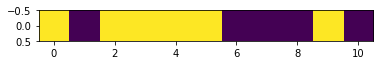

In [519]:
plt.imshow(ebi)

In [520]:
intervals(ebi[0,:])

[1, 3, 1]

In [521]:
pks(ebi[0,:])

[1, 4, 1]

# SAVE RESULTS

In [63]:
mean_tau=np.mean(np.mean(minima_edges_Single,axis=0),axis=0)
mean_tau_p=np.mean(np.mean(minima_edges_Single_p,axis=0),axis=0)
mean_tau_g=np.mean(np.mean(minima_edges_Single_g,axis=0),axis=0)

In [64]:
# np.savez('/Users/giovanni/Documents/GitHub/fufo/data/Pierpaolo-MEG/Edge_measures.npz', corre=corre, corre_p=corre_p, corre_g=corre_g, grade=grade, grade_p=grade_p, grade_g=grade_g,
#         upgrade=upgrade, upgrade_p=upgrade_p, upgrade_g=upgrade_g, dgrade=dgrade, dgrade_p=dgrade_p, dgrade_g=dgrade_g,abrade=abrade, abrade_p=abrade_p, abrade_g=abrade_g,
#         i_width=i_width,i_width_p=i_width_p,i_width_g=i_width_g, m_width=m_width,m_width_p=m_width_p,m_width_g=m_width_g,v_width=v_width,v_width_p=v_width_p,v_width_g=v_width_g,  
#          mean_tau=mean_tau, mean_tau_p=mean_tau_p, mean_tau_g=mean_tau_g)


In [24]:
measurea=np.load('/Users/giovanni/Documents/GitHub/fufo/data/Pierpaolo-MEG/Edge_measures.npz')


In [27]:
mug=np.mean(np.mean(measurea['upgrade'],axis=1),axis=0)
mug_p=np.mean(np.mean(measurea['grade_p'],axis=1),axis=0)
mug_g=np.mean(np.mean(measurea['grade_g'],axis=1),axis=0)
dg=np.mean(np.mean(measurea['dgrade'],axis=1),axis=0)
dg_p=np.mean(np.mean(measurea['dgrade_p'],axis=1),axis=0)
dg_g=np.mean(np.mean(measurea['dgrade_g'],axis=1),axis=0)
mg=np.mean(np.mean(measurea['grade'],axis=1),axis=0)
mg_p=np.mean(np.mean(measurea['grade_p'],axis=1),axis=0)
mg_g=np.mean(np.mean(measurea['grade_g'],axis=1),axis=0)
mean_tau=measurea['mean_tau']
mean_tau_p=measurea['mean_tau_p']
mean_tau_g=measurea['mean_tau_g']


In [79]:
md=np.mean(np.mean(diffe,axis=1),axis=0)
md_p=np.mean(np.mean(diffe_p,axis=1),axis=0)
md_g=np.mean(np.mean(diffe_g,axis=1),axis=0)

In [738]:
# Gradient at peaks
#Absolute value Gradient of edges
pgrade=np.zeros((44,10,3003))
pgrade_p=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        grad_bin=np.where(np.gradient(edg,axis=0)>0,1,-1)
        grad_bin=np.where(np.abs(edg)>4,grad_bin,0)
        pgrade[i,j,:]=np.sum(grad_bin,axis=0)
        
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        grad_bin=np.where(np.gradient(edg,axis=0)>0,1,-1)
        grad_bin=np.where(np.abs(edg)>4,grad_bin,0)
        pgrade_p[i,j,:]=np.sum(grad_bin,axis=0)
mpg=np.mean(np.mean(pgrade,axis=1),axis=0)
mpg_p=np.mean(np.mean(pgrade_p,axis=1),axis=0)

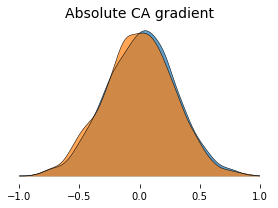

In [757]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Absolute CA gradient', fontsize=14)
density = stats.kde.gaussian_kde(mpg,0.2)
density_p = stats.kde.gaussian_kde(mpg_p,0.2)
x = np.linspace(-1,1,150)

plt.plot(x, density(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.7)
plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.7)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
#plt.savefig('averanking_distr.pdf')
plt.show()

In [31]:
def pks_ranges(a,k=1):
    # Create an array of how long are all the intervals (zero sequences).
    iszero = np.concatenate(([0], np.equal(a, k).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return list(ranges)

In [71]:
ebi=np.zeros((1,11));ebi[0,0]=1;ebi[0,2]=1;ebi[0,3]=1;ebi[0,4]=1;ebi[0,5]=1;ebi[0,9]=-1

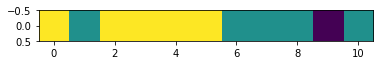

In [72]:
plt.imshow(ebi)

In [73]:
ebi[0,pks_ranges(ebi[0,:],1)]

array([[1., 0.],
       [1., 0.]])

In [74]:
pks_ranges(ebi[0,:],-1)[0][0]

9

In [46]:
pburst_profile=[]
nburst_profile=[]
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        gradiente=np.gradient(edg,axis=0)
        edg_bin=np.where(np.abs(edg)>4,edg,0)
        edg_bin=np.where(edg_bin>0,1,edg_bin);edg_bin=np.where(edg_bin<0,-1,edg_bin)
        for k in range(3003):
            pranger=pks_ranges(edg_bin[:,k],1)
            nranger=pks_ranges(edg_bin[:,k],-1)
            for lp in range(len(pranger)):
                if (pranger[lp][1]-pranger[lp][0]>20):
                    pburst_profile.append(gradiente[pranger[lp][0]:pranger[lp][1],k])
            for ln in range(len(nranger)):
                if (nranger[ln][1]-nranger[ln][0]>20):
                    nburst_profile.append(gradiente[nranger[ln][0]:nranger[ln][1],k])

In [49]:
pburst_profile_p=[]
nburst_profile_p=[]
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        gradiente=np.gradient(edg,axis=0)
        edg_bin=np.where(np.abs(edg)>4,edg,0)
        edg_bin=np.where(edg_bin>0,1,edg_bin);edg_bin=np.where(edg_bin<0,-1,edg_bin)
        for k in range(3003):
            pranger=pks_ranges(edg_bin[:,k],1)
            nranger=pks_ranges(edg_bin[:,k],-1)
            for lp in range(len(pranger)):
                if (pranger[lp][1]-pranger[lp][0]>20):
                    pburst_profile_p.append(gradiente[pranger[lp][0]:pranger[lp][1],k])
            for ln in range(len(nranger)):
                if (nranger[ln][1]-nranger[ln][0]>20):
                    nburst_profile_p.append(gradiente[nranger[ln][0]:nranger[ln][1],k])

In [58]:
len(nburst_profile)

3503

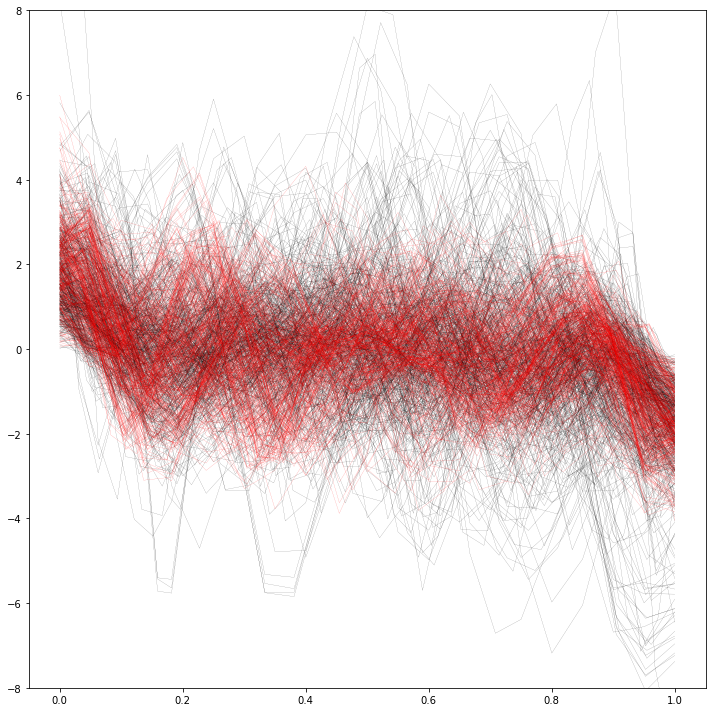

In [56]:
plt.figure(figsize=(10,10))
for i in range(len(pburst_profile))[::10]:
    plt.plot(np.linspace(0,1,len(pburst_profile[i])),pburst_profile[i],'k',linewidth=0.1)
for i in range(len(pburst_profile_p)):
    plt.plot(np.linspace(0,1,len(pburst_profile_p[i])),pburst_profile_p[i],'r',linewidth=0.1)
plt.ylim(-8,8)
plt.tight_layout()
plt.show()

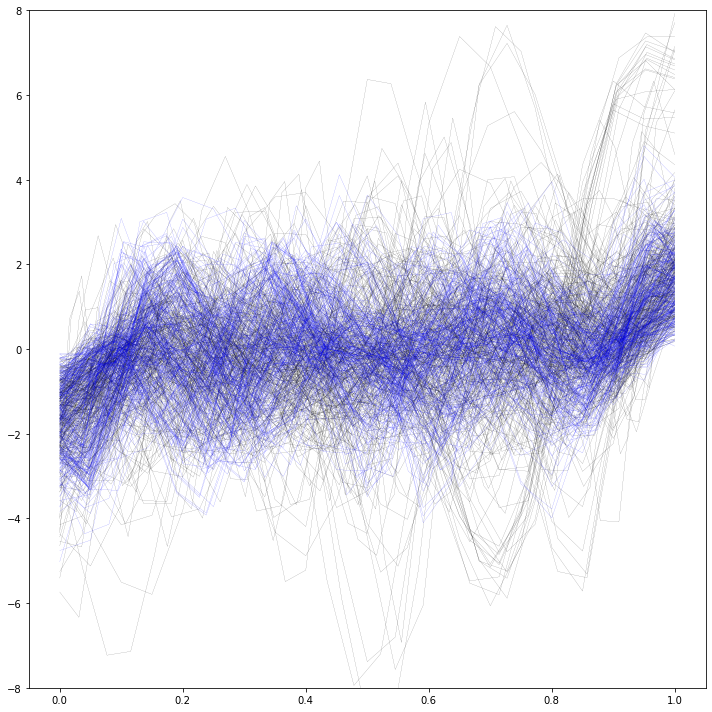

In [60]:
plt.figure(figsize=(10,10))
for i in range(len(nburst_profile))[::12]:
    plt.plot(np.linspace(0,1,len(nburst_profile[i])),nburst_profile[i],'k',linewidth=0.1)
for i in range(len(nburst_profile_p)):
    plt.plot(np.linspace(0,1,len(nburst_profile_p[i])),nburst_profile_p[i],'b',linewidth=0.1)
plt.ylim(-8,8)
plt.tight_layout()
plt.show()

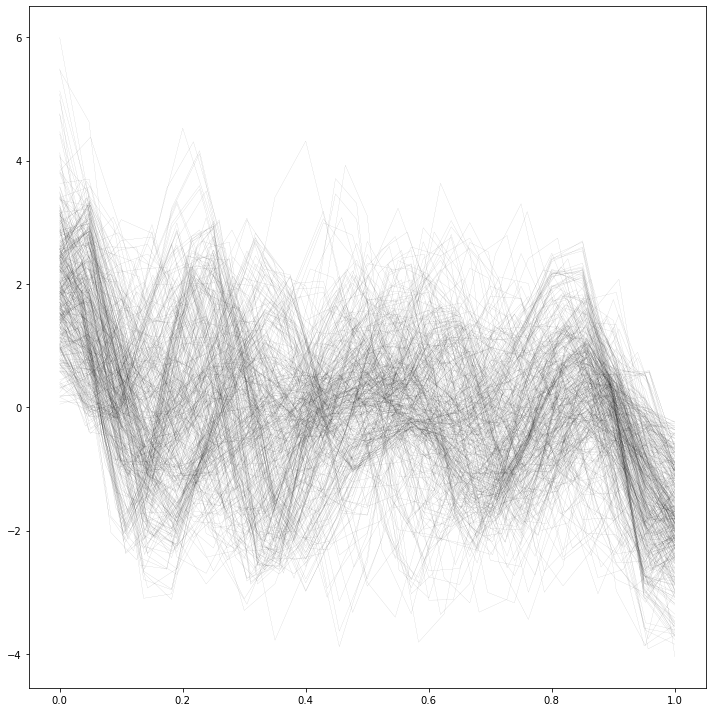

In [51]:
plt.figure(figsize=(10,10))
for i in range(len(pburst_profile_p)):
    plt.plot(np.linspace(0,1,len(pburst_profile_p[i])),pburst_profile_p[i],'k',linewidth=0.05)
plt.tight_layout()
plt.show()

# SCATTERPLOTS

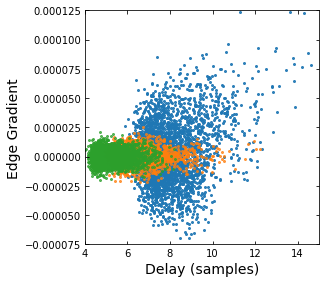

In [29]:
# the random data
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(5, 5))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
# ax_histx = plt.axes(rect_histx)
# ax_histx.tick_params(direction='in', labelbottom=False)
# ax_histy = plt.axes(rect_histy)
# ax_histy.tick_params(direction='in', labelleft=False)
# ax_histx.set_frame_on(False)
# ax_histy.set_frame_on(False)

# the scatter plot:
ax_scatter.scatter(mean_tau,mg,s=4,alpha=0.9)
ax_scatter.scatter(mean_tau_p,mg_p,s=4,alpha=0.75);
ax_scatter.scatter(mean_tau_g,mg_g,s=4,alpha=0.75);

# now determine nice limits by hand:
#binwidth = 0.25
#lim = np.ceil(np.abs([mean_tau, mg]).max() / binwidth) * binwidth
ax_scatter.set_ylim((-0.000075, 0.000125))
ax_scatter.set_xlim((4, 15))

#bins = np.arange(-lim, lim + binwidth, binwidth)
xdensity = stats.kde.gaussian_kde(mean_tau)
xdensity_p = stats.kde.gaussian_kde(mean_tau_p)
xdensity_g = stats.kde.gaussian_kde(mean_tau_g)
x = np.linspace(4,15,150)
#ax_histx.plot(x, xdensity(x),c='k',linewidth=0.5,label='original')
# ax_histx.fill_between(x, xdensity(x), facecolor=sns.color_palette()[0], alpha=0.)
#ax_histx.plot(x, xdensity_p(x),c='k',linewidth=0.5,label='phase surrogate')
# ax_histx.fill_between(x, xdensity_p(x), facecolor=sns.color_palette()[1], alpha=0.)
#ax_histx.plot(x, xdensity_g(x),c='k',linewidth=0.5,label='phase surrogate')
# ax_histx.fill_between(x, xdensity_g(x), facecolor=sns.color_palette()[2], alpha=0.)
# ax_histx.set_yticks([])

ydensity = stats.kde.gaussian_kde(mg);ydensity.covariance_factor = lambda : .75
ydensity_p = stats.kde.gaussian_kde(mg_p)
ydensity_g = stats.kde.gaussian_kde(mg_g)
y = np.linspace(-0.000075, 0.000125,150)

# ax_histy.plot(ydensity(y),y,c='k',linewidth=0.5,label='original')
# ax_histy.fill_between(ydensity(y), y,facecolor=sns.color_palette()[0], alpha=0.7)
# ax_histy.plot(ydensity_p(y),y,c='k',linewidth=0.5,label='phase surrogate')
# ax_histy.fill_between(ydensity_p(y), y, facecolor=sns.color_palette()[1], alpha=0.8)
# ax_histy.plot(ydensity_g(y),y,c='k',linewidth=0.5,label='phase surrogate')
# ax_histy.fill_between(ydensity_g(y),y, facecolor=sns.color_palette()[2], alpha=0.5)
# ax_histy.set_xticks([])
# ax_histx.hist(mean_tau, bins=100)
# ax_histy.hist(mg, bins=100, orientation='horizontal')
# ax_histx.hist(mean_tau_p, bins=100)
# ax_histy.hist(mg_p, bins=100, orientation='horizontal')
# ax_histx.hist(mean_tau_g, bins=100)
# ax_histy.hist(mg_g, bins=100, orientation='horizontal')
# ax_histx.set_xlim(ax_scatter.get_xlim())
# ax_histy.set_ylim(ax_scatter.get_ylim())
ax_scatter.set_xlabel('Delay (samples)',fontsize=14);ax_scatter.set_ylabel('Edge Gradient',fontsize=14)
#plt.savefig('scattergrad.pdf',bbox_inches='tight')
plt.show()

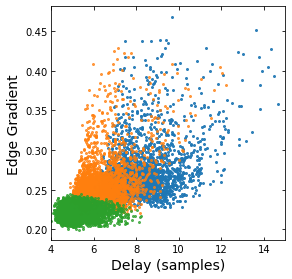

In [63]:
# the random data
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(5, 5))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)

# the scatter plot:
ax_scatter.scatter(mean_tau,vg,s=4,alpha=0.9)
ax_scatter.scatter(mean_tau_p,vg_p,s=4,alpha=0.75);
ax_scatter.scatter(mean_tau_g,vg_g,s=4,alpha=0.75);

#ax_scatter.set_ylim((-0.000075, 0.000125))
ax_scatter.set_xlim((4, 15))
ax_scatter.set_xlabel('Delay (samples)',fontsize=14);ax_scatter.set_ylabel('Edge Gradient',fontsize=14)
#plt.savefig('scattergrad.pdf',bbox_inches='tight')
plt.show()

# BOOTSTRAP CORRELATIONS

In [71]:
stats.spearmanr(mean_tau,mean_tau_p)

SpearmanrResult(correlation=0.9446945094730763, pvalue=0.0)

In [69]:
mean_tau.shape

(3003,)

In [48]:
boot_decay_lenburst=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_lenburst[i,0],boot_decay_lenburst[i,1]=stats.spearmanr(mean_tau[orde],i_width[orde])
boot_decay_lenburst_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_lenburst_p[i,0],boot_decay_lenburst_p[i,1]=stats.spearmanr(mean_tau_p[orde],i_width_p[orde])
boot_decay_lenburst_g=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_lenburst_g[i,0],boot_decay_lenburst_g[i,1]=stats.spearmanr(mean_tau_g[orde],i_width_g[orde])

In [49]:
stats.spearmanr(mean_tau_p,i_width_p)

SpearmanrResult(correlation=0.27269602215432936, pvalue=2.3442551612750797e-52)

In [50]:
stats.spearmanr(mean_tau_g,i_width_g)

SpearmanrResult(correlation=0.14668525449397632, pvalue=6.546871800250494e-16)

In [51]:
stats.spearmanr(mean_tau,i_width)

SpearmanrResult(correlation=0.23887546373002755, pvalue=3.126399214011437e-40)

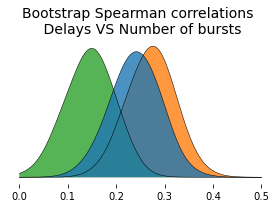

In [65]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Bootstrap Spearman correlations \n Delays VS Number of bursts', fontsize=14)
density = stats.kde.gaussian_kde(boot_decay_lenburst[:,0],0.5)
density_p = stats.kde.gaussian_kde(boot_decay_lenburst_p[:,0],0.5)
density_g = stats.kde.gaussian_kde(boot_decay_lenburst_g[:,0],0.5)
x = np.linspace(0.,0.5,150)

plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.8)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='Gauss surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.8)
plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
plt.savefig('boot-DelayBursts.pdf')
plt.show()

In [53]:
boot_decay_miet=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_miet[i,0],boot_decay_miet[i,1]=stats.spearmanr(mean_tau[orde],m_width[orde])
boot_decay_miet_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_miet_p[i,0],boot_decay_miet_p[i,1]=stats.spearmanr(mean_tau_p[orde],m_width_p[orde])
boot_decay_miet_g=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_miet_g[i,0],boot_decay_miet_g[i,1]=stats.spearmanr(mean_tau_g[orde],m_width_g[orde])

In [54]:
stats.spearmanr(mean_tau,m_width)

SpearmanrResult(correlation=-0.24816735969231404, pvalue=2.2056848833590498e-43)

In [55]:
stats.spearmanr(mean_tau_p,m_width_p)

SpearmanrResult(correlation=-0.2823040691191607, pvalue=3.89154184710277e-56)

In [56]:
stats.spearmanr(mean_tau_g,m_width_g)

SpearmanrResult(correlation=-0.1649515588579551, pvalue=9.208817493786697e-20)

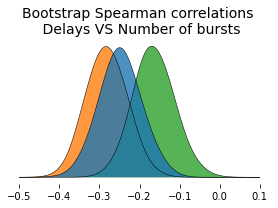

In [57]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Bootstrap Spearman correlations \n Delays VS Number of bursts', fontsize=14)
density = stats.kde.gaussian_kde(boot_decay_miet[:,0],0.5)
density_p = stats.kde.gaussian_kde(boot_decay_miet_p[:,0],0.5)
density_g = stats.kde.gaussian_kde(boot_decay_miet_g[:,0],0.5)
x = np.linspace(-0.5,0.1,150)

plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.8)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='Gauss surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.8)
plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
#plt.savefig('boot-DelayBursts.pdf')
plt.show()

In [58]:
boot_decay_viet=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_viet[i,0],boot_decay_viet[i,1]=stats.spearmanr(mean_tau[orde],v_width[orde])
boot_decay_viet_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_viet_p[i,0],boot_decay_viet_p[i,1]=stats.spearmanr(mean_tau_p[orde],v_width_p[orde])
boot_decay_viet_g=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_viet_g[i,0],boot_decay_viet_g[i,1]=stats.spearmanr(mean_tau_g[orde],v_width_g[orde])

In [59]:
stats.spearmanr(mean_tau,v_width)

SpearmanrResult(correlation=-0.22242829576136333, pvalue=5.598746260736477e-35)

In [60]:
stats.spearmanr(mean_tau_p,v_width_p)

SpearmanrResult(correlation=-0.1836294039767031, pvalue=3.4872210429172526e-24)

In [61]:
stats.spearmanr(mean_tau_g,v_width_g)

SpearmanrResult(correlation=0.20856164572017097, pvalue=7.246133055504195e-31)

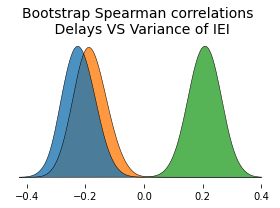

In [68]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Bootstrap Spearman correlations \n Delays VS Variance of IEI', fontsize=14)
density = stats.kde.gaussian_kde(boot_decay_viet[:,0],0.5)
density_p = stats.kde.gaussian_kde(boot_decay_viet_p[:,0],0.5)
density_g = stats.kde.gaussian_kde(boot_decay_viet_g[:,0],0.5)
x = np.linspace(-.425,0.4,150)

plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.8)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='Gauss surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.8)
plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
plt.savefig('boot-DelayVarIEI.pdf')
plt.show()

In [31]:
# GRADIENT BOOTSTRAP

boot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_r[i,0],boot_r[i,1]=stats.spearmanr(mean_tau[orde],mg[orde])
boot_r_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_r_p[i,0],boot_r_p[i,1]=stats.spearmanr(mean_tau_p[orde],mg_p[orde])

In [32]:
stats.spearmanr(mean_tau_p,mg_p)

SpearmanrResult(correlation=-0.002750304188086421, pvalue=0.8802492902448404)

In [33]:
stats.spearmanr(mean_tau,mg)

SpearmanrResult(correlation=0.11785167479580677, pvalue=9.286869999036287e-11)

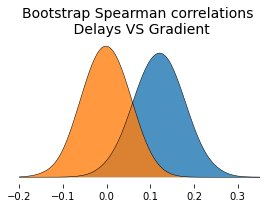

In [34]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Bootstrap Spearman correlations \n Delays VS Gradient', fontsize=14)
density = stats.kde.gaussian_kde(boot_r[:,0],0.5)
density_p = stats.kde.gaussian_kde(boot_r_p[:,0],0.5)
x = np.linspace(-0.2,0.35,150)

plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.8)

ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
plt.savefig('boot-delaygradient.pdf')
plt.show()

In [35]:
upboot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    upboot_r[i,0],upboot_r[i,1]=stats.spearmanr(mean_tau[orde],mug[orde])
dboot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    dboot_r[i,0],dboot_r[i,1]=stats.spearmanr(mean_tau[orde],dg[orde])

In [73]:
stats.spearmanr(mean_tau,dg)

SpearmanrResult(correlation=-0.02937398755725715, pvalue=0.10753745266353994)

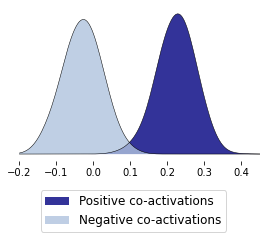

In [36]:
f, ax = plt.subplots(figsize=(4., 3.5))

#plt.title('Bootstract correlations - Delays VS Gradient', fontsize=14)
density = stats.kde.gaussian_kde(upboot_r[:,0],0.5)
density_p = stats.kde.gaussian_kde(dboot_r[:,0],0.5)
x = np.linspace(-0.2,0.45,150)

plt.plot(x, density(x),c='k',linewidth=0.5)
plt.fill_between(x, density(x), facecolor='navy', alpha=0.8,label='Positive co-activations')
plt.plot(x, density_p(x),c='k',linewidth=0.5)
plt.fill_between(x, density_p(x), facecolor='lightsteelblue', alpha=0.8,label='Negative co-activations')

ax.set_frame_on(False)
plt.yticks([])
plt.legend(fontsize=12,loc='best', bbox_to_anchor=(0.35, -0.65, 0.5, 0.5));
plt.tight_layout()
plt.savefig('boot-delaygradient_updown.pdf')
plt.show()

In [37]:
upboot_r_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    upboot_r_p[i,0],upboot_r_p[i,1]=stats.pearsonr(mean_tau_p[orde],mug_p[orde])
dboot_r_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    dboot_r_p[i,0],dboot_r_p[i,1]=stats.pearsonr(mean_tau_p[orde],dg_p[orde])

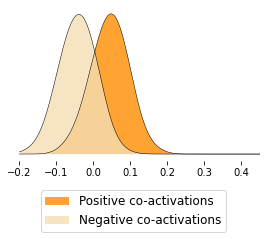

In [38]:
f, ax = plt.subplots(figsize=(4, 3.5))

density = stats.kde.gaussian_kde(upboot_r_p[:,0],0.5)
density_p = stats.kde.gaussian_kde(dboot_r_p[:,0],0.5)
x = np.linspace(-0.2,0.45,150)

plt.plot(x, density(x),c='k',linewidth=0.5)
plt.fill_between(x, density(x), facecolor='darkorange', alpha=0.8,label='Positive co-activations')
plt.plot(x, density_p(x),c='k',linewidth=0.5)
plt.fill_between(x, density_p(x), facecolor='wheat', alpha=0.8,label='Negative co-activations')

ax.set_frame_on(False)
plt.yticks([])
plt.legend(fontsize=12,loc='best', bbox_to_anchor=(0.35, -0.65, 0.5, 0.5));
plt.tight_layout()
plt.savefig('boot-delaygradient_updown_p.pdf')
plt.show()

In [64]:
# GRADIENT BOOTSTRAP

boot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_r[i,0],boot_r[i,1]=stats.spearmanr(mean_tau[orde],vg[orde])
boot_r_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_r_p[i,0],boot_r_p[i,1]=stats.spearmanr(mean_tau_p[orde],vg_p[orde])

In [65]:
stats.spearmanr(mean_tau_p,vg_p)

SpearmanrResult(correlation=0.21549036463229632, pvalue=6.939064609548368e-33)

In [66]:
stats.spearmanr(mean_tau,vg)

SpearmanrResult(correlation=0.2470888328312253, pvalue=5.202778927162518e-43)

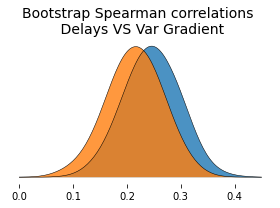

In [68]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Bootstrap Spearman correlations \n Delays VS Var Gradient', fontsize=14)
density = stats.kde.gaussian_kde(boot_r[:,0],0.5)
density_p = stats.kde.gaussian_kde(boot_r_p[:,0],0.5)
x = np.linspace(-0.,0.45,150)

plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.8)

ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
#plt.savefig('boot-delaygradient.pdf')
plt.show()

# DISTRIBUTIONS

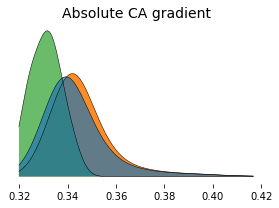

In [106]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Absolute CA gradient', fontsize=14)
density = stats.kde.gaussian_kde(mab,0.5)
density_p = stats.kde.gaussian_kde(mab_p,0.5)
density_g = stats.kde.gaussian_kde(mab_g,0.5)
x = np.linspace(np.min(mab),np.max(mab),150)

plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.9)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.7)
plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.7)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
#plt.savefig('averanking_distr.pdf')
plt.show()

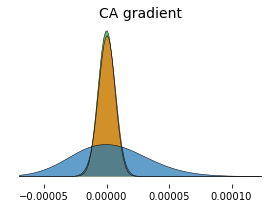

In [110]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('CA gradient', fontsize=14)
density = stats.kde.gaussian_kde(mg,0.5)
density_p = stats.kde.gaussian_kde(mg_p,0.5)
density_g = stats.kde.gaussian_kde(mg_g,0.5)
x = np.linspace(np.min(mg),np.max(mg),150)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.7)
plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.7)

plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.7)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
#plt.savefig('averanking_distr.pdf')
plt.show()

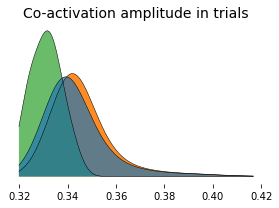

In [105]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Co-activation amplitude in trials', fontsize=14)
density = stats.kde.gaussian_kde(mab,0.5)
density_p = stats.kde.gaussian_kde(mab_p,0.5)
density_g = stats.kde.gaussian_kde(mab_g,0.5)
x = np.linspace(np.min(mab),np.max(mab),150)

plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.9)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.7)
plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.7)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
#plt.savefig('averanking_distr.pdf')
plt.show()

In [518]:
i_width=i_width[np.where(i_width!=0)]

In [521]:
i_width_p=i_width[np.where(i_width_p!=0)]
i_width_g=i_width[np.where(i_width_g!=0)]

### EDGES AMPLITUDES DISTRIBUTION

In [ ]:
Edg=np.zeros((44,10,int(2560*3003)))
Edg_p=np.zeros((44,10,int(2560*3003)))
Edg_g=np.zeros((44,10,int(2560*3003)))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        Edg[i,j,:]=np.concatenate(edg)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        Edg_p[i,j,:]=np.concatenate(edg)
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        Edg_g[i,j,:]=np.concatenate(edg)

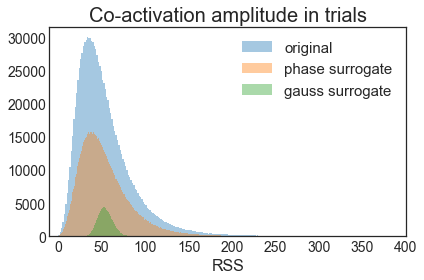

In [349]:
# Histogram of co-activations amplitude in original data and surrogates (pooled)
plt.figure(figsize=(6,4));
plt.title('Co-activation amplitude in trials',fontsize=20)
plt.hist(Edg.flatten(), bins=1000,alpha=0.4,label='original');
plt.hist(Edg_p.flatten(), bins=1000,alpha=0.4,label='phase surrogate');
plt.hist(Edg_g.flatten(), bins=1000,alpha=0.4,label='gauss surrogate');
plt.legend(fontsize=15)
plt.xlim(-10,400)
plt.xlabel('RSS',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

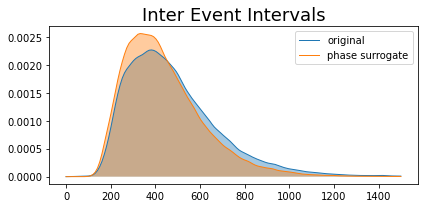

In [636]:
f, ax = plt.subplots(figsize=(6., 3.))

plt.title('Co-activation amplitude in trials', fontsize=14)
density = stats.kde.gaussian_kde(Edg.flatten())
density_p = stats.kde.gaussian_kde(Edg_p.flatten())
density_g = stats.kde.gaussian_kde(Edg_g.flatten())
x = np.linspace(0,1500,150)

plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.4)
plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.4)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.4)
plt.legend()
plt.tight_layout()
#plt.savefig('averanking_distr.pdf')
plt.show()

### EDGES AMPLITUDES DISTRIBUTION

In [512]:
upboot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    upboot_r[i,0],upboot_r[i,1]=stats.pearsonr(mean_tau[orde],mg[orde])
dboot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    dboot_r[i,0],dboot_r[i,1]=stats.pearsonr(mean_tau[orde],mg_p[orde])

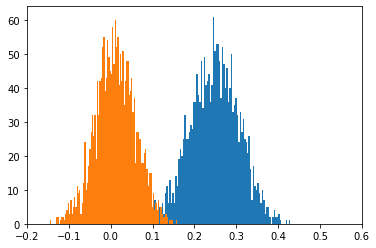

In [513]:
plt.figure()
plt.hist(upboot_r[:,0],100)
plt.hist(dboot_r[:,0],100)
plt.xlim(-0.2,0.6)
plt.show()

In [507]:
upboot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    upboot_r[i,0],upboot_r[i,1]=stats.pearsonr(mean_tau[orde],mug[orde])
dboot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    dboot_r[i,0],dboot_r[i,1]=stats.pearsonr(mean_tau[orde],dg[orde])

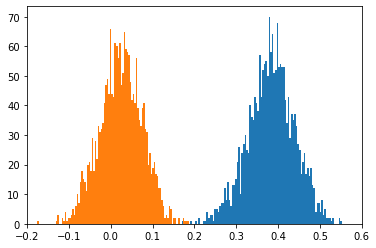

In [509]:
plt.figure()
plt.hist(upboot_r[:,0],100)
plt.hist(dboot_r[:,0],100)
plt.xlim(-0.2,0.6)
plt.show()

In [510]:
upboot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    upboot_r[i,0],upboot_r[i,1]=stats.pearsonr(mean_tau_p[orde],mug_p[orde])
dboot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    dboot_r[i,0],dboot_r[i,1]=stats.pearsonr(mean_tau_p[orde],dg_p[orde])

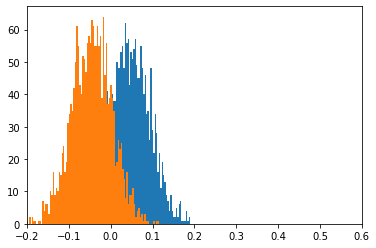

In [511]:
plt.figure()
plt.hist(upboot_r[:,0],100)
plt.hist(dboot_r[:,0],100)
plt.xlim(-0.2,0.6)
plt.show()

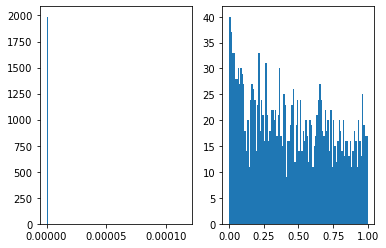

In [483]:
plt.figure()
plt.subplot(121)
plt.hist(upboot_r[:,1],100)
plt.subplot(122)
plt.hist(dboot_r[:,1],100)

plt.show()

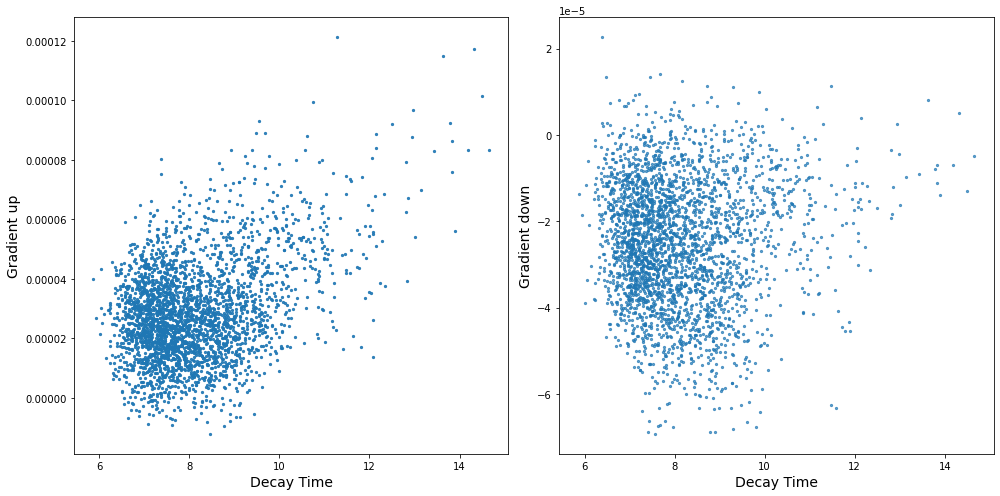

In [504]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.scatter(mean_tau,mug,s=5,alpha=0.9)
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('Gradient up',fontsize=14)
plt.subplot(122)
plt.scatter(mean_tau,dg,s=5,alpha=0.7);
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('Gradient down',fontsize=14)
plt.tight_layout()
plt.show()

In [401]:
dfg = pd.DataFrame(
    { 
        '': ['all']*nedges*3,
        'Mean absoulte gradient': list(mg)+list(mg_p)+list(mg_g),
        'dataset':  ['original']*nedges+['phase surr']*nedges+['gauss surr']*nedges,
    }
) 

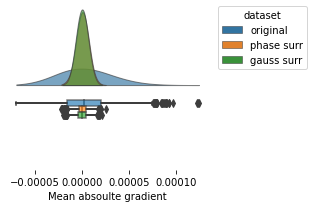

In [402]:
f, ax = plt.subplots(figsize=(4.5, 3))

dhue = "dataset"; ort="h"; pall = sns.color_palette()

ax=pt.RainCloud( x = '', y = 'Mean absoulte gradient', hue = dhue, data = dfg, palette = pall, bw = .5, width_viol = 1.25, ax = ax, orient = ort , alpha = .65, dodge = True,point_size=0.)

# ax=pt.RainCloud( x = '', y = 'Delay (samples)', hue = dhue, data = dfg, palette = pall, bw = .18,
#                  width_viol = 1.25, ax = ax, orient = ort , alpha = .65, dodge = True,point_size=0.)

# ax=pt.half_violinplot(x = 'Delay (samples)', y = '', hue = dhue, data = dfg, palette = pall, bw = .2, cut = 0.,scale = "area", width = 1., inner = None)

ax.set_frame_on(False)
ax.set_yticks([])

plt.tight_layout()
plt.savefig('Grad_distr.pdf') 
plt.show()

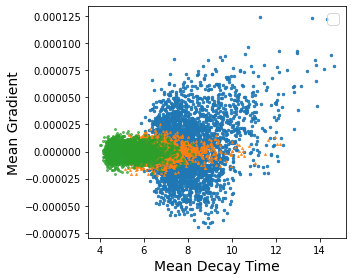

In [411]:
plt.figure(figsize=(5,4))
plt.scatter(mean_tau,mg,s=6,alpha=0.9)
plt.scatter(mean_tau_p,mg_p,marker='^',s=4,alpha=0.75);
plt.xlabel('Mean Decay Time',fontsize=14);plt.ylabel('Mean Gradient',fontsize=14)
plt.scatter(mean_tau_g,mg_g,marker='x',s=4,alpha=0.75);
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

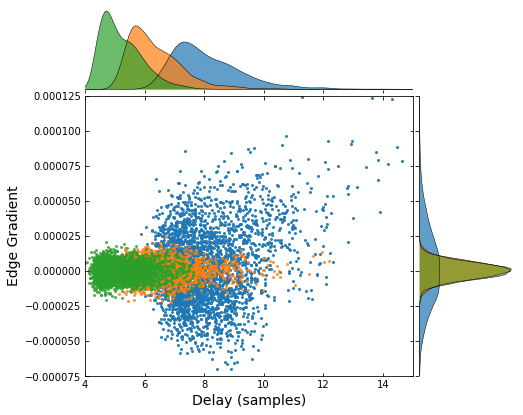

In [467]:
# the random data
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(7, 6))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

ax_histx.set_frame_on(False)
ax_histy.set_frame_on(False)



# the scatter plot:
ax_scatter.scatter(mean_tau,mg,s=4,alpha=0.9)
ax_scatter.scatter(mean_tau_p,mg_p,s=4,alpha=0.75);
ax_scatter.scatter(mean_tau_g,mg_g,s=4,alpha=0.75);

# now determine nice limits by hand:
#binwidth = 0.25
#lim = np.ceil(np.abs([mean_tau, mg]).max() / binwidth) * binwidth
ax_scatter.set_ylim((-0.000075, 0.000125))
ax_scatter.set_xlim((4, 15))

#bins = np.arange(-lim, lim + binwidth, binwidth)
xdensity = stats.kde.gaussian_kde(mean_tau)
xdensity_p = stats.kde.gaussian_kde(mean_tau_p)
xdensity_g = stats.kde.gaussian_kde(mean_tau_g)
x = np.linspace(4,15,150)
ax_histx.plot(x, xdensity(x),c='k',linewidth=0.5,label='original')
ax_histx.fill_between(x, xdensity(x), facecolor=sns.color_palette()[0], alpha=0.7)
ax_histx.plot(x, xdensity_p(x),c='k',linewidth=0.5,label='phase surrogate')
ax_histx.fill_between(x, xdensity_p(x), facecolor=sns.color_palette()[1], alpha=0.7)
ax_histx.plot(x, xdensity_g(x),c='k',linewidth=0.5,label='phase surrogate')
ax_histx.fill_between(x, xdensity_g(x), facecolor=sns.color_palette()[2], alpha=0.7)
ax_histx.set_yticks([])

ydensity = stats.kde.gaussian_kde(mg);ydensity.covariance_factor = lambda : .75
ydensity_p = stats.kde.gaussian_kde(mg_p)
ydensity_g = stats.kde.gaussian_kde(mg_g)
y = np.linspace(-0.000075, 0.000125,150)

ax_histy.plot(ydensity(y),y,c='k',linewidth=0.5,label='original')
ax_histy.fill_between(ydensity(y), y,facecolor=sns.color_palette()[0], alpha=0.7)
ax_histy.plot(ydensity_p(y),y,c='k',linewidth=0.5,label='phase surrogate')
ax_histy.fill_between(ydensity_p(y), y, facecolor=sns.color_palette()[1], alpha=0.8)
ax_histy.plot(ydensity_g(y),y,c='k',linewidth=0.5,label='phase surrogate')
ax_histy.fill_between(ydensity_g(y),y, facecolor=sns.color_palette()[2], alpha=0.5)
ax_histy.set_xticks([])

# ax_histx.hist(mean_tau, bins=100)
# ax_histy.hist(mg, bins=100, orientation='horizontal')
# ax_histx.hist(mean_tau_p, bins=100)
# ax_histy.hist(mg_p, bins=100, orientation='horizontal')
# ax_histx.hist(mean_tau_g, bins=100)
# ax_histy.hist(mg_g, bins=100, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_scatter.set_xlabel('Delay (samples)',fontsize=14);ax_scatter.set_ylabel('Edge Gradient',fontsize=14)
plt.savefig('scattergrad.pdf',bbox_inches='tight')
plt.show()

In [443]:
ax_histy.lines

[]

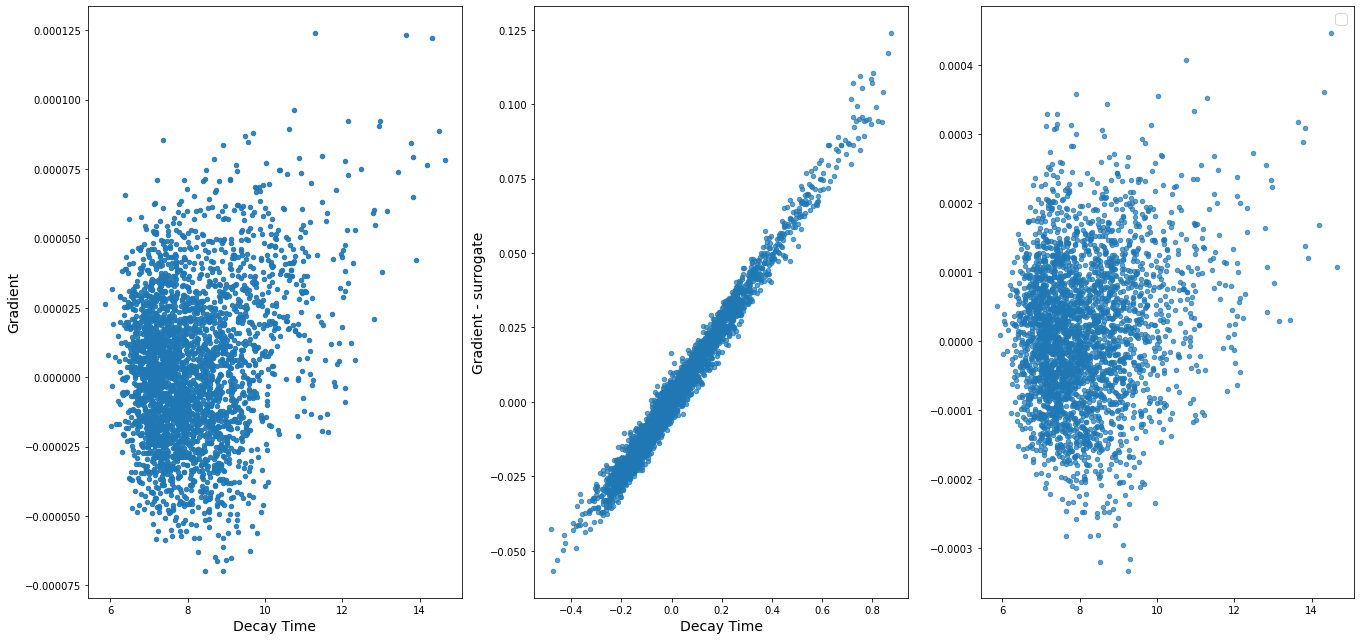

In [379]:
plt.figure(figsize=(19,9))
plt.subplot(131)
plt.scatter(mean_tau,mg,s=20,alpha=0.9)
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('Gradient',fontsize=14)
plt.subplot(132)
plt.scatter(mm,ma,s=20,alpha=0.7);
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('Gradient - surrogate',fontsize=14)
plt.subplot(133)
plt.scatter(mean_tau,ms,s=20,alpha=0.7);
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [36]:
#correlation values of edges
span=np.zeros((44,10,3003))
span_p=np.zeros((44,10,3003))
span_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        span[i,j,:]=np.max(edg,axis=0)-np.min(edg,axis=0)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        span_p[i,j,:]=np.max(edg,axis=0)-np.min(edg,axis=0)
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        span_g[i,j,:]=np.max(edg,axis=0)-np.min(edg,axis=0)

In [331]:
Var_e=np.reshape(vare,(-1,nedges))
Mean_e=np.reshape(corre,(-1,nedges))
Fano_e=np.reshape(fano,(-1,nedges))

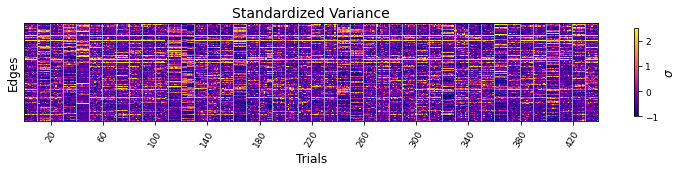

In [346]:
plt.figure(figsize=(10.5,2.5))
plt.title('Standardized Variance',fontsize=14)
plt.imshow(stats.zscore(Var_e[:,np.argsort(np.mean(minima_collect,axis=0))],axis=1)[:,::-1].T,cmap='plasma',interpolation='nearest',aspect='auto',vmin=-1.,vmax=2.5)
cbar=plt.colorbar(shrink=0.9)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('$\sigma$',fontsize=12)
#plt.yticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=0,fontsize=16)
#plt.xticks(np.arange(5,440)[::10],['Sub %d'%i for i in range(44)], rotation=60,fontsize=16)
for i in range(44):
    plt.axvline(10*i-0.5,linewidth=0.75,color='lightsteelblue')
plt.ylabel('Edges',fontsize=12)
plt.xlabel('Trials',fontsize=12)
plt.xticks(10*np.arange(44)[::4]+20,fontsize=9,rotation=60)
plt.yticks([])
plt.tight_layout()
#plt.savefig('AMIminima_trials.pdf') 
plt.show()

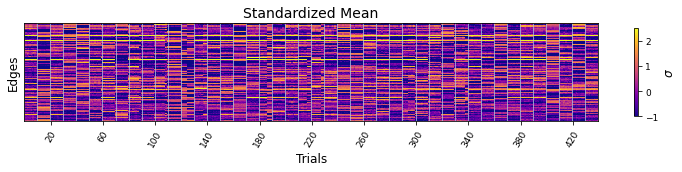

In [347]:
plt.figure(figsize=(10.5,2.5))
plt.title('Standardized Mean',fontsize=14)
plt.imshow(stats.zscore(Mean_e[:,np.argsort(np.mean(minima_collect,axis=0))],axis=1)[:,::-1].T,cmap='plasma',interpolation='nearest',aspect='auto',vmin=-1.,vmax=2.5)
cbar=plt.colorbar(shrink=0.9)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('$\sigma$',fontsize=12)
#plt.yticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=0,fontsize=16)
#plt.xticks(np.arange(5,440)[::10],['Sub %d'%i for i in range(44)], rotation=60,fontsize=16)
for i in range(44):
    plt.axvline(10*i-0.5,linewidth=0.75,color='lightsteelblue')
plt.ylabel('Edges',fontsize=12)
plt.xlabel('Trials',fontsize=12)
plt.xticks(10*np.arange(44)[::4]+20,fontsize=9,rotation=60)
plt.yticks([])
plt.tight_layout()
#plt.savefig('AMIminima_trials.pdf') 
plt.show()

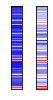

In [42]:
plt.figure(figsize=(0.85,1.5))
mv=np.mean(np.mean(vare,axis=0),axis=0)
mm=np.mean(np.mean(corre,axis=0),axis=0)
plt.subplot(121)
plt.imshow(np.expand_dims(mv,1),cmap='bwr',interpolation='nearest',aspect='auto');
plt.yticks([]);plt.xticks([])
plt.subplot(122)
plt.imshow(np.expand_dims(mm,1),cmap='bwr',interpolation='nearest',aspect='auto');
plt.yticks([]);plt.xticks([])
plt.tight_layout()
#plt.savefig('FUN_degree.pdf') 
plt.show()

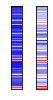

In [92]:
plt.figure(figsize=(0.85,1.5))
mv_p=np.mean(np.mean(vare_p,axis=0),axis=0)
mm_p=np.mean(np.mean(corre_p,axis=0),axis=0)
plt.subplot(121)
plt.imshow(np.expand_dims(mv,1),cmap='bwr',interpolation='nearest',aspect='auto');
plt.yticks([]);plt.xticks([])
plt.subplot(122)
plt.imshow(np.expand_dims(mm,1),cmap='bwr',interpolation='nearest',aspect='auto');
plt.yticks([]);plt.xticks([])
plt.tight_layout()
#plt.savefig('FUN_degree.pdf') 
plt.show()

In [284]:
dfg0 = pd.DataFrame(
    { 
        'Edge Gradient':  mg,
        'Decay Time (samples)': mean_tau,
        'Edge Gradient_p':  mg_p,
        'Decay Time p': mean_tau_p,
        'Edge Gradient_g':  mg_g,
        'Decay Time g': mean_tau_g
    }
) 

In [ ]:
# dfg3 = pd.DataFrame(
#     { 
#         '': ['Edge Gradient']*len(mg)+ ['Edge Gradient']*len(mg_p)+ ['Edge Gradient']*len(mg_g),
#         'Edge Gradient': list(mg)+list(mg_p)+list(mg_g),
#         'dataset':  ['original']*len(mg)+['phase surr']*len(mg_p)+['gauss surr']*len(mg_g),
#     }
# ) 

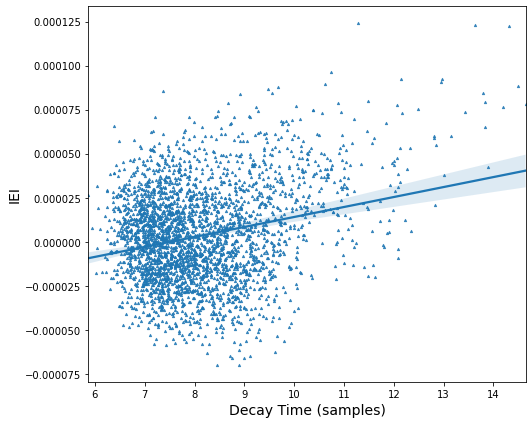

In [258]:
# import seaborn as sns; sns.set_theme(color_codes=True)
dhue = "dataset"
f, ax = plt.subplots(figsize=(7.5, 6))
ax = sns.regplot(x="Decay Time (samples)", y="Edge Gradient", data=dfg0, marker="^",ci=100, scatter_kws={'s':5})
ax = sns.regplot(x="Decay Time p", y="Edge Gradient_p", data=dfg0, marker="+",ci=100, scatter_kws={'s':5})
ax = sns.regplot(x="Decay Time g", y="Edge Gradient_g", data=dfg0, marker="+",ci=100, scatter_kws={'s':5})
plt.ylabel('IEI',fontsize=14)
plt.xlabel('Decay Time (samples)',fontsize=14)
plt.tight_layout()
#plt.savefig('CorrVS.pdf')
plt.show()

In [306]:
np.where(minima_edges_Single==np.max(minima_edges_Single))

(array([17]), array([2]), array([154]))

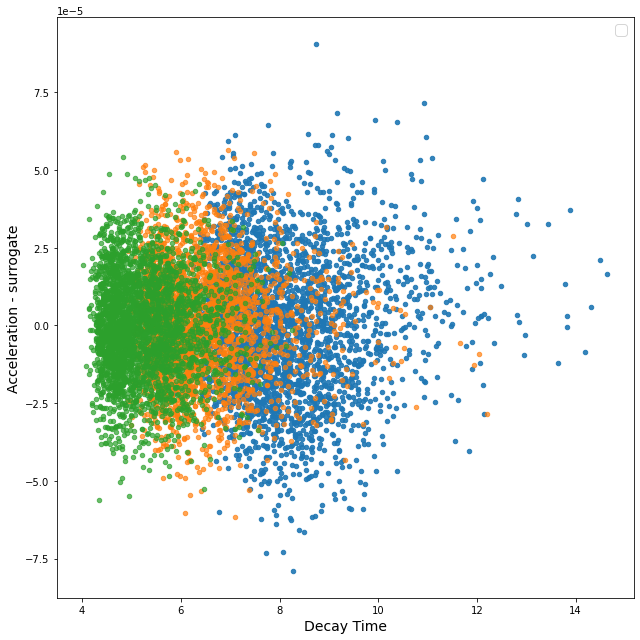

In [299]:
plt.figure(figsize=(9,9))
plt.scatter(mean_tau,ma,s=20,alpha=0.9)
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('Acceleration',fontsize=14)
plt.scatter(mean_tau_p,ma_p,s=20,alpha=0.7);
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('Acceleration - surrogate',fontsize=14)
plt.scatter(mean_tau_g,ma_g,s=20,alpha=0.7);
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [300]:
boot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_r[i,0],boot_r[i,1]=stats.pearsonr(mean_tau[orde],ma[orde])

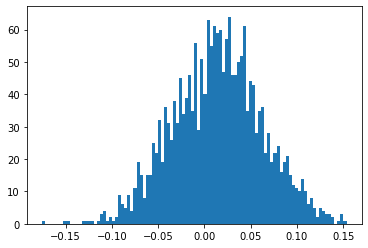

In [301]:
plt.hist(boot_r[:,0],100)
plt.show()

In [294]:
boot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_r[i,0],boot_r[i,1]=stats.pearsonr(mean_tau[orde],mg[orde])

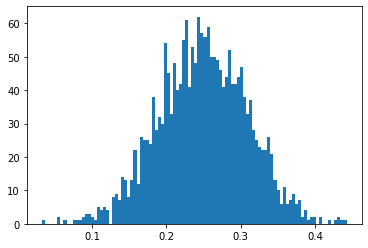

In [295]:
plt.hist(boot_r[:,0],100)
plt.show()

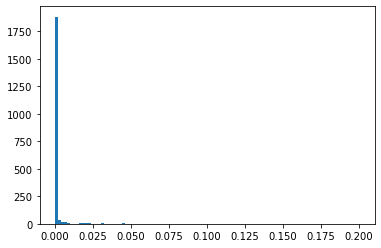

In [238]:
plt.hist(boot_r[:,1],100)
plt.show()

In [263]:
order_grad=np.argsort(mg)

In [273]:
order_tau=np.argsort(mean_tau)

In [274]:
order_tau

array([1227, 1106, 1226, ..., 2264, 2262,   38])

In [264]:
order_grad

array([2385,  348, 1408, ..., 2264, 2337, 1625])

In [361]:
f=np.zeros((nregions,nregions))
f[np.triu_indices(nregions,1)]=np.arange(3003)+1
dice={}
for i in range(3003):
    dice['%d'%i]=(list(np.where(f==i+1)[0])[0],list(np.where(f==i+1)[1])[0])

In [367]:
dice['3002']

(76, 77)

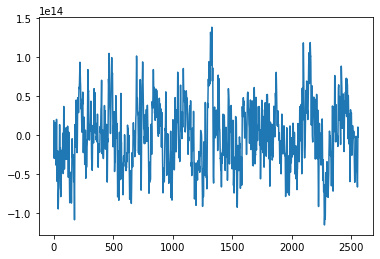

In [323]:
plt.figure()
plt.plot(Trials['2'][0][:,0])
#plt.plot(Trials['17'][2][:,4])

In [348]:
med=np.zeros(44)
for i in range(44):
    med[i]=np.mean(Trials['%d'%i])

In [349]:
print(med)

[ 2.68949416e+07 -2.75578679e+10  6.59260806e+09 -1.41567919e+10
 -7.11115179e+08 -1.51626481e+09 -1.52759903e+09 -1.49306592e+10
  2.35150962e+09 -2.86262462e+10 -1.63076680e+09  8.11748010e+09
  1.59164685e+11 -5.86782517e+09 -1.17322442e+10 -1.92487216e+10
  2.03492271e+10  1.35075494e+09 -1.33396267e+10  1.95694980e+10
  4.22310370e+09 -1.78830775e+09 -6.93286229e+09  3.13298608e+10
 -1.20276838e+11 -2.08602524e+09  2.98216754e+09  6.01867017e+09
  9.74816609e+09 -1.99252936e+09 -8.54808847e+09 -4.12803839e+08
 -3.94367636e+10 -9.96379298e+10 -6.00635284e+09 -7.35807614e+09
  1.01241919e+10 -1.20209502e+07 -9.41625185e+09  3.93959896e+09
  4.00008543e+09  2.16710707e+10  2.63560822e+09 -3.69466880e+09]


In [ ]:
Pierpa=med[]

In [350]:
ord0=np.random.randint(78,)
ord0

24

In [334]:
med=np.zeros(44)
for i in range(44):
    med[i]=np.mean(minima_edges_Single[i])

In [335]:
print(med)

[ 9.08684649  5.64302364  8.86676657  9.63386613  7.25934066  6.91888112
  7.75784216  5.61315351  7.32464202  6.67715618  6.63549784 15.59327339
  6.72797203  5.44595405  5.97415917  6.42007992 10.09180819  7.77502498
  7.75824176  6.52910423  9.83010323  6.72244422 10.7959041   8.87858808
 11.8951382   7.71908092  6.57992008 11.4971695   6.51508492  7.87216117
  9.61944722  7.12777223  6.72017982 13.03283383  7.30932401  8.38554779
  9.07029637  6.16633367  5.89054279  6.6044955   6.07922078 10.97036297
 11.17862138  6.6956377 ]


In [333]:
minima_edges_Single.shape

(44, 10, 3003)

In [313]:
Trials.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43'])

In [201]:
corg=np.zeros((440,2))
for i in range(440):
    corg[i,0],corg[i,1]=stats.pearsonr(np.concatenate(minima_edges_Single)[i,:],np.concatenate(grade)[i,:])

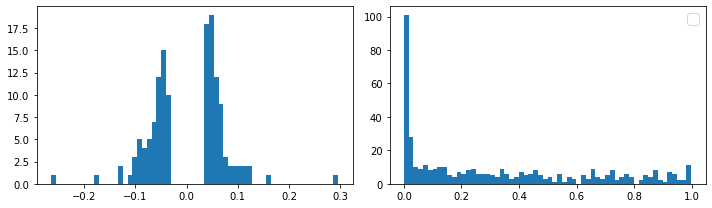

In [216]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(corg[np.where(corg[:,1]<0.05)[0],0],60)
plt.subplot(122)
plt.hist(corg[:,1],60)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [206]:
np.where(corg[:,1]<0.05)

(array([  1,   9,  11,  12,  19,  21,  24,  26,  27,  29,  30,  35,  41,
         42,  44,  46,  49,  54,  56,  59,  60,  69,  72,  73,  74,  77,
         85,  86,  90,  93,  94,  95,  99, 100, 101, 104, 108, 112, 113,
        119, 120, 121, 122, 125, 133, 138, 139, 140, 147, 148, 149, 150,
        152, 161, 170, 173, 181, 182, 186, 187, 188, 189, 196, 200, 201,
        205, 210, 214, 215, 217, 221, 227, 235, 236, 238, 244, 245, 247,
        248, 249, 250, 253, 257, 259, 262, 263, 266, 271, 276, 278, 284,
        288, 290, 294, 295, 296, 300, 309, 311, 314, 316, 317, 318, 319,
        321, 322, 325, 332, 333, 337, 339, 354, 355, 360, 362, 363, 364,
        365, 367, 369, 376, 380, 390, 391, 393, 405, 406, 407, 408, 409,
        411, 423, 424, 425, 426, 430, 431, 433, 437]),)

In [196]:
stats.pearsonr(mean_tau,mg)

(0.2520959910170285, 9.34481051679267e-45)

In [171]:
np.corrcoef(mean_tau,mg)

array([[1.        , 0.25209599],
       [0.25209599, 1.        ]])

In [172]:
np.corrcoef(mean_tau_p,mg_p)

array([[1.        , 0.00489397],
       [0.00489397, 1.        ]])

In [188]:
np.corrcoef(mean_tau_g,mg_g)

array([[1.        , 0.00651024],
       [0.00651024, 1.        ]])

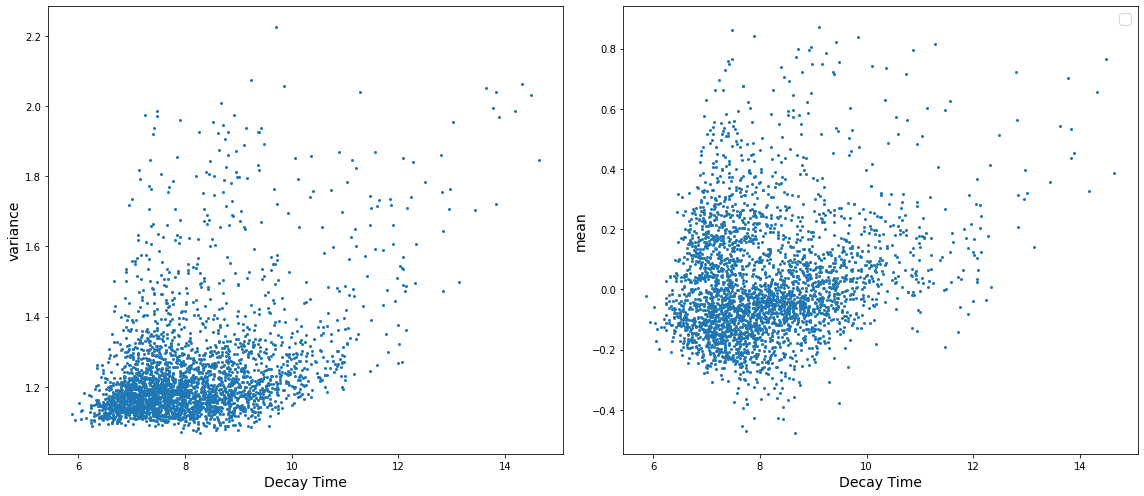

In [339]:
plt.figure(figsize=(14,9))
plt.scatter(mean_tau,mg,s=10,alpha=0.8,c=asample);
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('mean',fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [182]:
grade.shape

(44, 10, 3003)

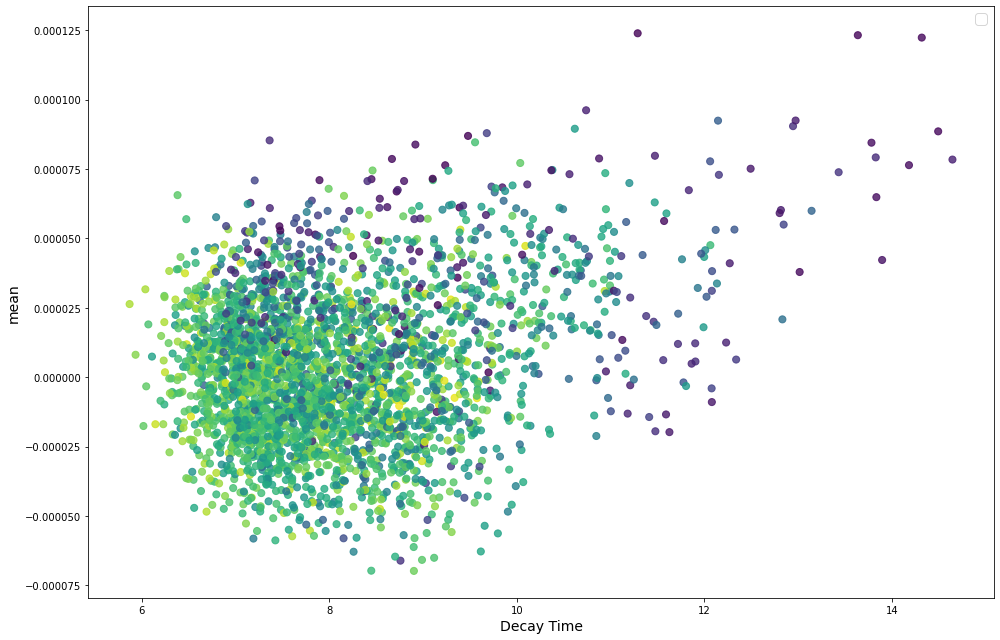

In [193]:
plt.figure(figsize=(14,9))
plt.scatter(mean_tau,mg,s=50,alpha=0.8,c=i_width);
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('mean',fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [90]:
fc=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        fc[i,j,:]=np.mean(Edges['%d'%i][j],axis=0)

In [94]:
FC=np.mean(np.mean(fc,axis=1),axis=0)

In [95]:
np.max(FC)

0.872626731431503

In [96]:
np.min(FC)

-0.47832187636735707

In [56]:
corre_collect=np.reshape(corre, (-1,3003))

In [75]:
boot_r=np.zeros((5000,2))
for i in range(5000):
    orde=np.random.randint(0,3003,500)
    boot_r[i,0],boot_r[i,1]=stats.pearsonr(mean_tau[orde],mm[orde])

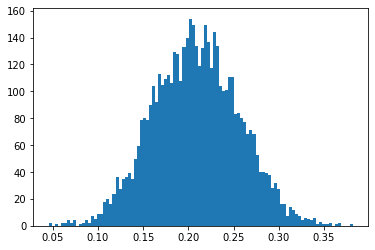

In [76]:
plt.hist(boot_r[:,0],100)
plt.show()

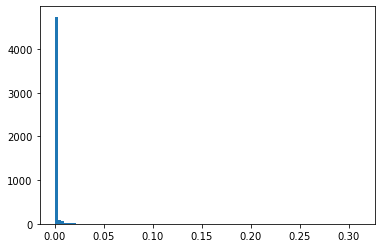

In [86]:
plt.hist(boot_r[:,1],100)
plt.show()

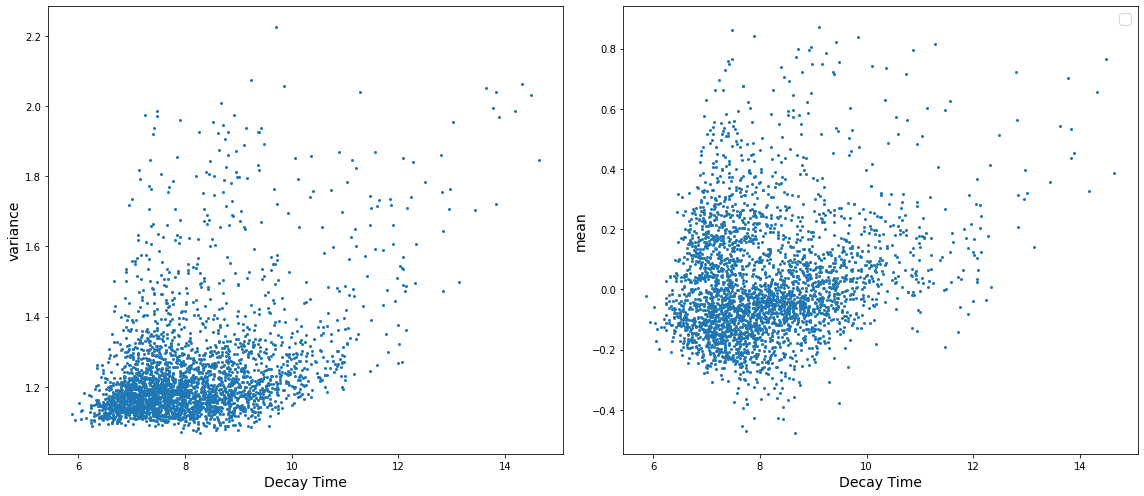

In [339]:
plt.figure(figsize=(16,7))
plt.subplot(121)
plt.scatter(mean_tau,mv,s=4)
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('variance',fontsize=14)
plt.subplot(122)
plt.scatter(mean_tau,mm,s=4);
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('mean',fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# different modes represent variability across trials and subjects?

In [344]:
mmp=np.zeros((5000,2))
mvp=np.zeros((5000,2))
for i in range(5000):
    orde=np.random.randint(0,3003,750)
    mmp[i,0],mmp[i,1]=stats.pearsonr(mean_tau[orde],mm[orde])
    mvp[i,0],mvp[i,1]=stats.pearsonr(mean_tau[orde],mv[orde])

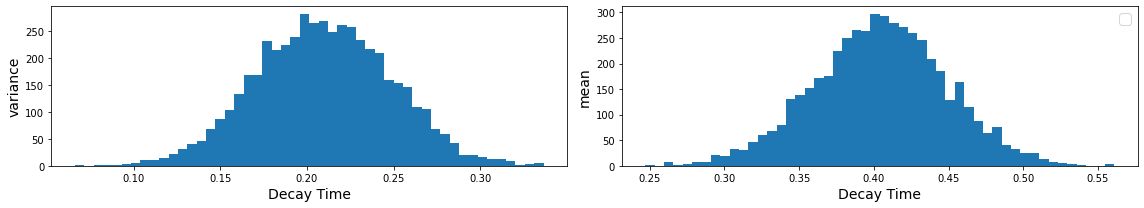

In [348]:
plt.figure(figsize=(16,3))
plt.subplot(121)
plt.hist(mmp[:,0],50)
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('variance',fontsize=14)
plt.subplot(122)
plt.hist(mvp[:,0],50)
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('mean',fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

# Integration Segregation

In [580]:
import bct

In [652]:
import teneto as tenente

In [643]:
tri=np.where(np.abs(stats.zscore(Trials['10'][0]))>5,5,stats.zscore(Trials['10'][0]))

In [669]:
eddd=analysis.go_edge(Trials['0'][0])

In [670]:
np.where(eddd.max()

18.95808749799376

In [650]:
tnet=np.zeros((nregions,nregions,len(eddd)))
for i in range(len(eddd)):
    fccc[np.triu_indices(nregions,1)]=eddd[i]
    tnet[:,:,i]=fccc+np.identity(nregions)+fccc.T

In [651]:
modu=np.zeros(len(eddd))
commu=np.zeros((nregions,len(eddd)))
for i in range(len(eddd)):
    commu[:,i],modu[i]=bct.modularity_louvain_dir(tnet[:,:,i])

In [654]:
tenente.networkmeasures.sid(tnet,commu)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [600]:
rss=np.sqrt(np.sum(eddd**2,axis=1))

In [671]:
rss=np.sum(np.where(np.abs(eddd)>6,1,0),axis=1)

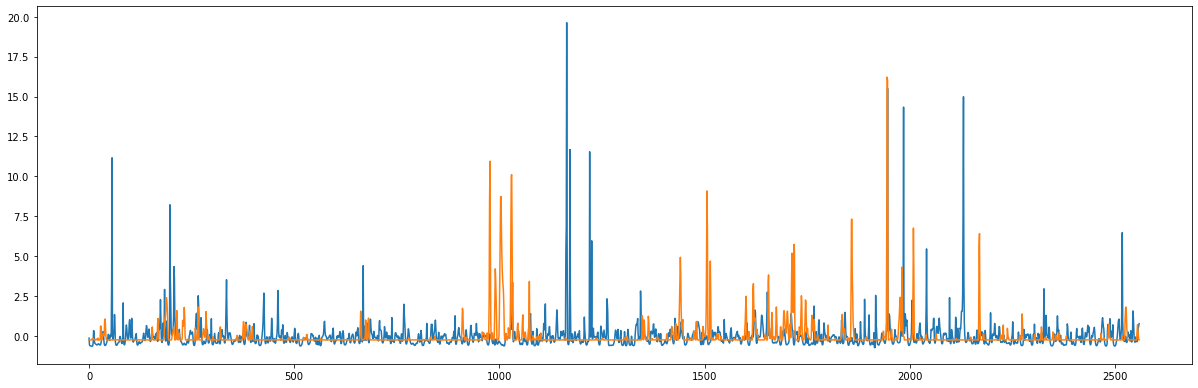

In [672]:
plt.figure(figsize=(16.75,5.5))
plt.plot(stats.zscore(modu))
plt.plot(stats.zscore(rss))
plt.tight_layout()
plt.show()

In [673]:
np.corrcoef(modu,rss)

array([[1.        , 0.12705417],
       [0.12705417, 1.        ]])

# Draw Edges original versus surrogate

In [199]:
iii=10
jjj=9
Edges=analysis.go_edge(Trials['%d'%iii][jjj])
Edges_p=analysis.go_edge(Trials_p['%d'%iii][jjj])

<Figure size 486x252 with 0 Axes>

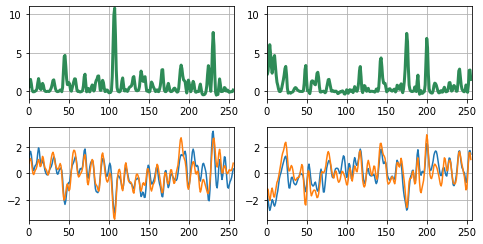

In [227]:
# Let us plot the matrix of the minima
plt.figure(figsize=(6.75,3.5))
f, ax = plt.subplots(figsize=(6.75,3.5))
ax2 = ax.twinx()
ax2.set_ylim(0,25)
                     
plt.subplot(221)
plt.plot(Edges[:256,1],c='seagreen',linewidth=3)
plt.grid()

plt.ylim(-1,11);plt.xlim(0,256)
plt.subplot(223)
plt.plot(stats.zscore(Trials['%d'%iii][jjj][:256,0]))
plt.plot(stats.zscore(Trials['%d'%iii][jjj][:256,2]))
plt.ylim(-3.5,3.5);plt.xlim(0,256)
plt.grid()
plt.subplot(222)
plt.plot(Edges_p[:256,1],c='seagreen',linewidth=3)
plt.ylim(-1,11);plt.xlim(0,256)
plt.grid()
plt.subplot(224)
plt.plot(stats.zscore(Trials_p['%d'%iii][jjj][:256,0]))
plt.plot(stats.zscore(Trials_p['%d'%iii][jjj][:256,2]))
plt.ylim(-3.5,3.5);plt.xlim(0,256)
plt.grid()
ax.axis('off')
ax2.set_frame_on(False)
plt.tight_layout()
#plt.savefig('MSC.pdf') 
plt.show()

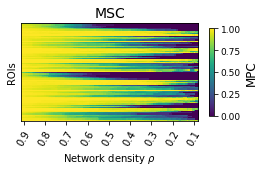

In [1582]:
# Let us plot the matrix of the minima
plt.figure(figsize=(3.75,2.5))
plt.title('MSC',fontsize=14)
plt.imshow(MSC[::-1,:].T,cmap='viridis',aspect='auto',interpolation='nearest')
cbar=plt.colorbar(shrink=0.9)
cbar.ax.tcick_params(labelsize=9)
cbar.set_label('MPC',fontsize=12)
plt.yticks([])
plt.xticks(np.arange(100)[::12]+1,np.asarray([0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]),rotation=60)
plt.xlabel('Network density $\\rho$')
plt.ylabel('ROIs')
plt.tight_layout()
#plt.savefig('MSC.pdf') 
plt.show()

In [1584]:
np.corrcoef(np.mean(MSC,axis=0),np.mean(MSC_p,axis=0))

array([[1.        , 0.92479218],
       [0.92479218, 1.        ]])

In [1568]:
gradnet=np.zeros((100,nedges))
for i in range(100):
    gradnet[i]=SUN[i][np.triu_indices(78,1)]-FUN[i][np.triu_indices(78,1)]

In [1052]:
# tks=np.arange(20,460)[::40]
# tks+=np.random.randint(10,size=len(tks))

In [33]:
dfgx = pd.DataFrame(
    { 
        '': ['all']*nedges,
        'Delay (samples)': list(np.mean(minima_sorted_tau,axis=0))
    }
) 

6.6525

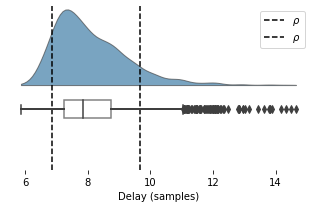

In [1430]:
f, ax = plt.subplots(figsize=(4.5, 3))

ort="h"; pall = sns.color_palette()

ax=pt.RainCloud( x = '', y = 'Delay (samples)',data = dfgx, palette = pall, bw = .18, width_viol = 1.25, ax = ax, orient = ort , alpha = .65, dodge = True,point_size=0.)

# ax=pt.RainCloud( x = '', y = 'Delay (samples)', hue = dhue, data = dfg, palette = pall, bw = .18,
#                  width_viol = 1.25, ax = ax, orient = ort , alpha = .65, dodge = True,point_size=0.)

# ax=pt.half_violinplot(x = 'Delay (samples)', y = '', hue = dhue, data = dfg, palette = pall, bw = .2, cut = 0.,scale = "area", width = 1., inner = None)

ax.set_frame_on(False)
ax.set_yticks([])
plt.axvline(np.percentile(np.mean(minima_sorted_tau,axis=0),10),c='k',linestyle='--',label='$\\rho$')
plt.axvline(np.percentile(np.mean(minima_sorted_tau,axis=0),90),c='k',linestyle='--',label='$\\rho$')
plt.legend()
plt.tight_layout()
plt.savefig('FID_distr_ori.pdf') 
plt.show()

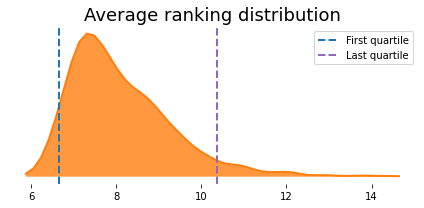

In [1143]:
f, ax = plt.subplots(figsize=(6., 3.))

plt.title('Average ranking distribution', fontsize=18)

rsseg=np.mean(minima_sorted_tau,axis=0)

density = stats.kde.gaussian_kde(rsseg)

x = np.linspace(rsseg.min(), rsseg.max(), 50)

plt.plot(x, density(x),c=sns.color_palette()[1],linewidth=2)
plt.fill_between(x, density(x), facecolor=sns.color_palette()[1], alpha=0.8)
#plt.axvline(3003/2,linewidth=2, linestyle='--',c='k',label='random')
plt.axvline(np.percentile(rsseg,5), linestyle='--',linewidth=2,c=sns.color_palette()[0],label='First quartile')
plt.axvline(np.percentile(rsseg,95), linestyle='--',linewidth=2,c=sns.color_palette()[4],label='Last quartile')
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
plt.legend()
plt.tight_layout()
#plt.savefig('averanking_distr.pdf')
plt.show()

### WIDTH OF INTER-EVENT INTERVAL DISTRIBUTION

In [33]:
def intervals(a):
    # Create an array of how long are all the intervals (zero sequences).
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return list(np.diff(ranges).flatten())

In [143]:
IET={}
IET_p={}
IET_g={}
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        edg_bin=np.where(np.abs(edg)>4,1,0) #np.percentile(edg,90)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        edg_bin_p=np.where(np.abs(edg)>4,1,0)        
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        edg_bin_g=np.where(np.abs(edg)>4,1,0)
        for k in range(3003):
            IET[(i,j,k)]=intervals(edg_bin[:,k])
            IET_p[(i,j,k)]=intervals(edg_bin_p[:,k])
            IET_g[(i,j,k)]=intervals(edg_bin_g[:,k])

In [144]:
interval_width=np.zeros((44,10,3003))
interval_width_p=np.zeros((44,10,3003))
interval_width_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        for k in range(3003):
            if len(IET[(i,j,k)][1:-1])>10:
                interval_width[i,j,k]=max(IET[(i,j,k)][1:-1])-min(IET[(i,j,k)][1:-1])
            if len(IET_p[(i,j,k)][1:-1])>10:
                interval_width_p[i,j,k]=max(IET_p[(i,j,k)][1:-1])-min(IET_p[(i,j,k)][1:-1])
            if len(IET_g[(i,j,k)][1:-1])>10:
                interval_width_g[i,j,k]=max(IET_g[(i,j,k)][1:-1])-min(IET_g[(i,j,k)][1:-1])

In [37]:
EA={}
EA_p={}
EA_g={}
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        edg_bin=np.where(np.abs(edg)>4,edg,0)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        edg_bin_p=np.where(np.abs(edg)>4,edg,0)        
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        edg_bin_g=np.where(np.abs(edg)>4,edg,0)
        for k in range(3003):
            EA[(i,j,k)]=edg_bin[:,k][edg_bin[:,k]!=0]
            EA_p[(i,j,k)]=edg_bin_p[:,k][edg_bin_p[:,k]!=0]
            EA_g[(i,j,k)]=edg_bin_g[:,k][edg_bin_g[:,k]!=0]

In [38]:
ea_width=np.zeros((44,10,3003))
ea_width_p=np.zeros((44,10,3003))
ea_width_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        for k in range(3003):
            if len(EA[(i,j,k)])>1:
                ea_width[i,j,k]=np.max(EA[(i,j,k)])
            if len(EA_p[(i,j,k)])>1:
                ea_width_p[i,j,k]=np.max(EA_p[(i,j,k)])
            if len(EA_g[(i,j,k)])>1:
                ea_width_g[i,j,k]=np.max(EA_g[(i,j,k)])

# PROPERTIES ACROSS ALL TRIALS

In [145]:
i_width=np.zeros(3003)
a_width=np.zeros(3003)
i_width_p=np.zeros(3003)
a_width_p=np.zeros(3003)
i_width_g=np.zeros(3003)
a_width_g=np.zeros(3003)
fano=np.zeros((3003))
fano_p=np.zeros((3003))
fano_g=np.zeros((3003))
for k in range(3003):
    ie=[];ie_p=[];ie_g=[]
    ae=[];ae_p=[];ae_g=[]
    fe=[];fe_p=[];fe_g=[]    
    for i in range(44):
        for j in range(10):
            fe.extend(IET[(i,j,k)][1:-1])
            if len(IET[(i,j,k)][1:-1])>3:
                ie.extend(IET[(i,j,k)])
            fe_p.extend(IET_p[(i,j,k)][1:-1])
            if len(IET_p[(i,j,k)][1:-1])>3:
                ie_p.extend(IET_p[(i,j,k)])
            fe_g.extend(IET_g[(i,j,k)][1:-1])
            if len(IET_g[(i,j,k)][1:-1])>3:
                ie_g.extend(IET_g[(i,j,k)])
            if len(EA[(i,j,k)])>4:
                ae.extend(EA[(i,j,k)])
            if len(EA_p[(i,j,k)])>4:
                ae_p.extend(EA_p[(i,j,k)])
            if len(EA_g[(i,j,k)])>4:
                ae_g.extend(EA_g[(i,j,k)])
    i_width[k]=np.var(ie)
    i_width_p[k]=np.var(ie_p)
    i_width_g[k]=np.var(ie_g)
    fano[k]=np.var(fe)/np.mean(fe)
    fano_p[k]=np.var(fe_p)/np.mean(fe_p)
    fano_g[k]=np.var(fe_g)/np.mean(fe_g)
    uno, due= np.histogram(ae,100)
    a_width[k]=due[np.argmax(uno)]
    uno, due= np.histogram(ae_p,100)
    a_width_p[k]=due[np.argmax(uno)]
    uno, due= np.histogram(ae_g,100)
    a_width_g[k]=due[np.argmax(uno)]

In [44]:
mean_tau=np.mean(np.mean(minima_edges_Single,axis=0),axis=0)
mean_tau_p=np.mean(np.mean(minima_edges_Single_p,axis=0),axis=0)
mean_tau_g=np.mean(np.mean(minima_edges_Single_g,axis=0),axis=0)

In [45]:
sample = ea_width[ea_width>0].flatten()
sample_p = ea_width_p[ea_width_p>0].flatten()
sample_g = ea_width_p[ea_width_g>0].flatten()

In [46]:
asample = interval_width[np.where(interval_width>0)].flatten()
asample_p = interval_width_p[np.where(interval_width_p>0)].flatten()
asample_g = interval_width_p[np.where(interval_width_g>0)].flatten()

In [559]:
dfg2 = pd.DataFrame(
    { 
        '': ['IEI']*len(asample)+ ['IEI']*len(asample_p)+ ['IEI']*len(asample_g),
        'IEI': list(asample)+list(asample_p)+list(asample_g),
        'dataset':  ['original']*len(asample)+['phase surr']*len(asample_p)+['gauss surr']*len(asample_g),
    }
) 

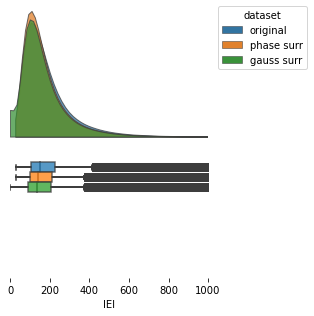

In [561]:
f, ax = plt.subplots(figsize=(4.5, 4.5))

dhue = "dataset"; ort="h"; pall = sns.color_palette()

ax=pt.RainCloud( x = '', y = 'IEI', hue = dhue, data = dfg2, palette = pall, bw = .18, width_viol = 1.25, ax = ax, orient = ort , alpha = .75, dodge = True,point_size=0.)

ax.set_frame_on(False)
ax.set_yticks([])
ax.set_xlim(0,1000)

plt.tight_layout()
#plt.savefig('IEI_distr.png',dpi=1000) 
plt.show()

In [562]:
sample=sample[np.where(sample<30)]
sample_p=sample_p[np.where(sample_p<30)]
sample_g=sample_g[np.where(sample_g<30)]

In [563]:
dfg3 = pd.DataFrame(
    { 
        '': ['EA']*len(sample)+ ['EA']*len(sample_p)+ ['EA']*len(sample_g),
        'EA': list(sample)+list(sample_p)+list(sample_g),
        'dataset':  ['original']*len(sample)+['phase surr']*len(sample_p)+['gauss surr']*len(sample_g),
    }
) 

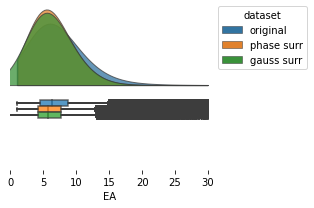

In [564]:
f, ax = plt.subplots(figsize=(4.5, 3))

dhue = "dataset"; ort="h"; pall = sns.color_palette()

ax=pt.RainCloud( x = '', y = 'EA', hue = dhue, data = dfg3, palette = pall, bw = .8, width_viol = 1.25, ax = ax, orient = ort , alpha = .75, dodge = True,point_size=0.)

ax.set_frame_on(False)
ax.set_yticks([])
ax.set_xlim(0,30)


plt.tight_layout()
#plt.savefig('EA_distr.png',dpi=1000) 
plt.show()

In [254]:
def norma(x):
    return (x-np.min(x))/np.max(x-np.min(x))

In [573]:
dfg0 = pd.DataFrame(
    { 
        'IEI':  norma(fano),
        'Decay Time (samples)': norma(mean_tau),
        'IEI_p':  norma(fano_p),
        'Decay Time p': norma(mean_tau_p),
        'IEI_g':  norma(fano_g),
        'Decay Time g': norma(mean_tau_g)
    }
) 

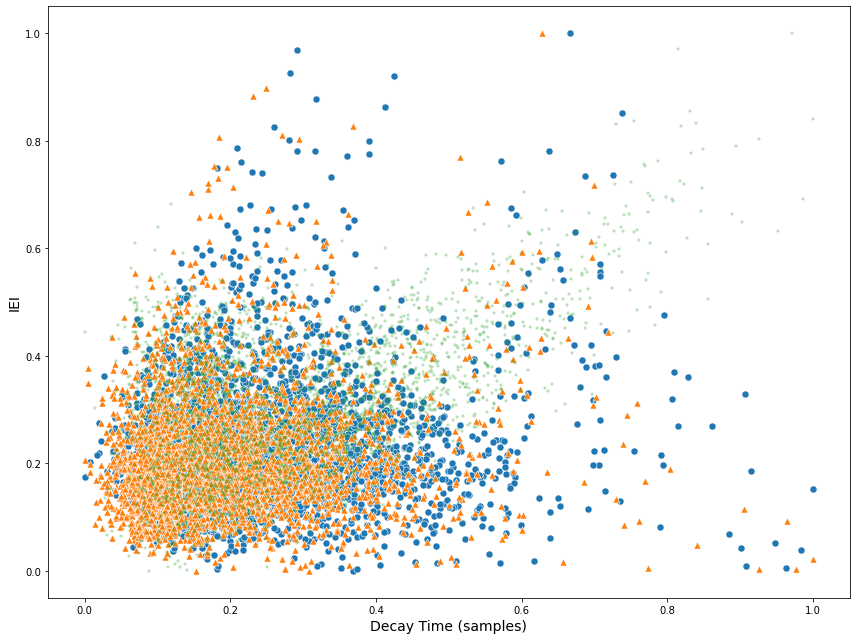

In [579]:
# import seaborn as sns; sns.set_theme(color_codes=True)
dhue = "dataset"
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.scatterplot(x="Decay Time (samples)", y="IEI", data=dfg0, marker="o",ci=100, s=50)
ax = sns.scatterplot(x="Decay Time p", y="IEI_p", data=dfg0, marker="^",ci=100,s=50)
ax = sns.scatterplot(x="Decay Time g", y="IEI_g", data=dfg0, marker="+",ci=100,s=15)
plt.ylabel('IEI',fontsize=14)
plt.xlabel('Decay Time (samples)',fontsize=14)
plt.tight_layout()
#plt.savefig('CorrVS.pdf')
plt.show()


In [575]:
rp=np.zeros((1000,2))
rp_p=np.zeros((1000,2))
rp_g=np.zeros((1000,2))
for i in range(1000):
    orde=np.random.randint(0,3003,1000)
    rp[i,0],rp[i,1]=stats.pearsonr(mean_tau[orde],fano[orde])
    rp_p[i,0],rp_p[i,1]=stats.pearsonr(mean_tau_p[orde],fano_p[orde])
    rp_g[i,0],rp_g[i,1]=stats.pearsonr(mean_tau_g[orde],fano_g[orde])

In [576]:
dfg4 = pd.DataFrame(
    { 
        '': ['corr']*1000 + ['corr']*1000+ ['corr']*1000,
        'Correlation': list(rp[:,0])+list(rp_p[:,0])+list(rp_g[:,0]),
        'dataset':  ['original']*1000+['phase surr']*1000+['gauss surr']*1000,
    }
) 

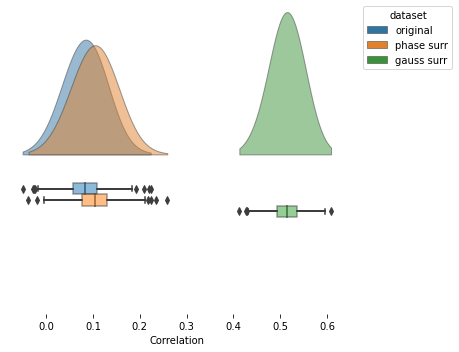

In [578]:
f, ax = plt.subplots(figsize=(6.5, 5))

dhue = "dataset"; ort="h"; pall = sns.color_palette()

ax=pt.RainCloud( x = '', y = 'Correlation', hue = dhue, data = dfg4, palette = pall, alpha=0.5, bw = .8, width_viol = 1.25, ax = ax, orient = ort , dodge = True,point_size=0.)

ax.set_frame_on(False)
ax.set_yticks([])
#ax.set_xlim(-0.25,0.4)

plt.tight_layout()
#plt.savefig('Corr_distr.png',dpi=1000) 
plt.show()

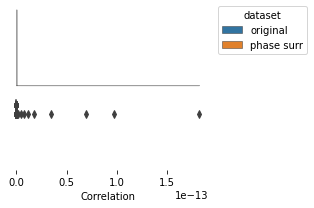

In [387]:
dfg8 = pd.DataFrame(
    { 
        '': ['corr']*1000 + ['corr']*1000,
        'Correlation': list(rp[:,1])+list(rp_p[:,1]),
        'dataset':  ['original']*1000+['phase surr']*1000,
    }
) 

f, ax = plt.subplots(figsize=(4.5, 3))

dhue = "dataset"; ort="h"; pall = sns.color_palette()

ax=pt.RainCloud( x = '', y = 'Correlation', hue = dhue, data = dfg8, palette = pall, alpha=0.5, bw = .8, width_viol = 1.25, ax = ax, orient = ort , dodge = True,point_size=0.)

ax.set_frame_on(False)
ax.set_yticks([])

plt.tight_layout()
#plt.savefig('Corr_distr.png',dpi=1000) 
plt.show()

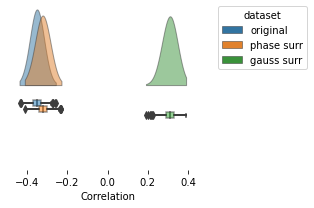

In [277]:
f, ax = plt.subplots(figsize=(4.5, 3))

dhue = "dataset"; ort="h"; pall = sns.color_palette()

ax=pt.RainCloud( x = '', y = 'Correlation', hue = dhue, data = dfg4, palette = pall, alpha=0.5, bw = .8, width_viol = 1.25, ax = ax, orient = ort , dodge = True,point_size=0.)

ax.set_frame_on(False)
ax.set_yticks([])
ax.set_xlim(-0.5,0.5)

plt.tight_layout()
#plt.savefig('Corr_distr.png',dpi=1000) 
plt.show()

# MEASURES TO DISTINGUISH THE SURROGATE PROPERTIES

In [334]:
Edg=np.zeros((44,10,2560))
Edg_p=np.zeros((44,10,2560))
Edg_g=np.zeros((44,10,2560))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        Edg[i,j,:]=np.sqrt(np.sum(edg**2,axis=1))
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        Edg_p[i,j,:]=np.sqrt(np.sum(edg**2,axis=1))
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        Edg_g[i,j,:]=np.sqrt(np.sum(edg**2,axis=1))

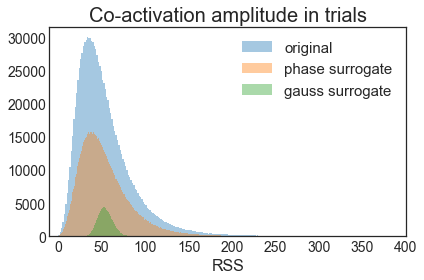

In [349]:
# Histogram of co-activations amplitude in original data and surrogates (pooled)
plt.figure(figsize=(6,4));
plt.title('Co-activation amplitude in trials',fontsize=20)
plt.hist(Edg.flatten(), bins=1000,alpha=0.4,label='original');
plt.hist(Edg_p.flatten(), bins=1000,alpha=0.4,label='phase surrogate');
plt.hist(Edg_g.flatten(), bins=1000,alpha=0.4,label='gauss surrogate');
plt.legend(fontsize=15)
plt.xlim(-10,400)
plt.xlabel('RSS',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

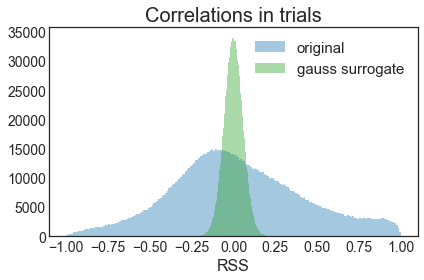

In [644]:
# Histogram of co-activations amplitude in original data and surrogates (pooled)
plt.figure(figsize=(6,4));
plt.title('Correlations in trials',fontsize=20)
plt.hist(corre.flatten(), bins=200,alpha=0.4,label='original');
plt.hist(corre_p.flatten(), bins=1000,alpha=0.);
plt.hist(corre_g.flatten(), bins=200,alpha=0.4,label='gauss surrogate');
plt.legend(fontsize=15)
plt.xlabel('RSS',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

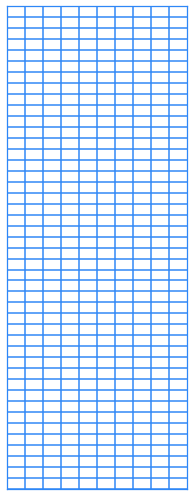

In [721]:
import matplotlib
plt.figure(figsize=(2.8,7))
matplotlib.rc('axes',edgecolor=[0.1785, 0.5296, 0.9677])
for i in range(10):
    plt.axvline(i,color=([0.1785, 0.5296, 0.9677]))
for i in range(44):
    plt.axhline(i,color=([0.1785, 0.5296, 0.9677]))
plt.xlim(0,10)
plt.ylim(0,44)
plt.xticks([]);plt.yticks([])
plt.tight_layout()
#plt.savefig('grid.pdf') 
plt.show()

In [299]:
import pandas as pd
import ptitprince as pt
import itertools
import seaborn as sns
pal = sns.color_palette(n_colors=1)

df = pd.DataFrame(
    { 
        'group': list(itertools.chain(*[['group%d'%i]*nedges for i in range(len(tks))])),
        'distribution': list(itertools.chain(*[list(minima_collect[tks][i]) for i in range(len(tks))]))
    }
) 

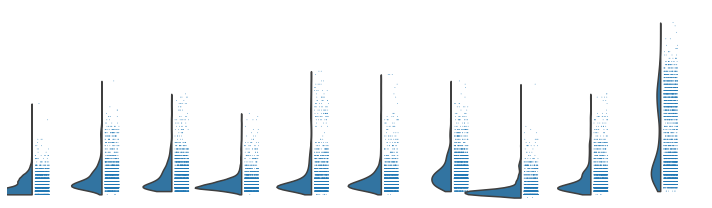

In [300]:
f, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0,60)
ax=pt.half_violinplot( x = 'group', y = 'distribution', data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = 1.6, inner = None)
ax=sns.stripplot(x = 'group', y = 'distribution', data = df, palette =pal, edgecolor = "white",
                 size = 0.75, jitter = 1, zorder = 0)
ax.axis('off')
plt.tight_layout()
#plt.savefig('FID_trials_distr.pdf') 
plt.show()

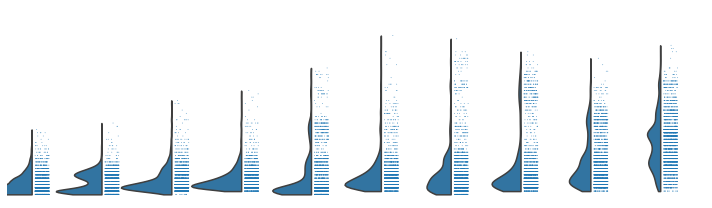

In [215]:
f, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0,60)
ax=pt.half_violinplot( x = 'group', y = 'distribution', data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = 1.6, inner = None)
ax=sns.stripplot(x = 'group', y = 'distribution', data = df, palette =pal, edgecolor = "white",
                 size = 0.75, jitter = 1, zorder = 0)
ax.axis('off')
plt.tight_layout()
#plt.savefig('FID_trials_distr.pdf') 
plt.show()

In [244]:
sorted_fids=minima_collect[np.ix_(np.argsort(np.mean(minima_collect,axis=1)),np.argsort(np.mean(minima_collect,axis=0)))]
#sorted_fids=minima_collect[np.argsort(np.var(minima_collect,axis=1)),:]
tks=np.arange(20,440)[::44]
tks+=14
#sorted_ranks=minima_rank[np.ix_(np.argsort(np.mean(minima_collect,axis=1)),np.argsort(np.mean(minima_collect,axis=0)))]
#sorted_fids=minima_collect[np.argsort(np.var(minima_collect,axis=1)),:]
sorted_fids[tks].shape

(10, 3003)

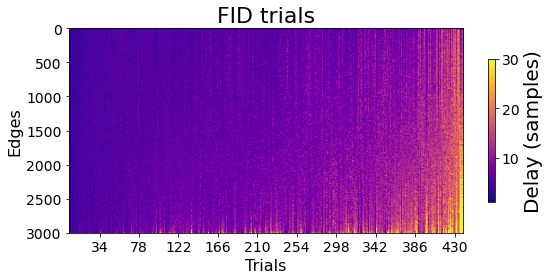

In [282]:
# Let us plot the matrix of the minima
plt.figure(figsize=(8,4))
plt.title('FID trials',fontsize=22)
plt.imshow(sorted_fids.T,cmap='plasma',interpolation='hanning',aspect='auto',vmax=30)
cbar=plt.colorbar(shrink=0.7)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Delay (samples)',fontsize=20)
#plt.yticks(lobes_id[:-1]+np.diff(lobes_id)/2,list(lobes_intervals.keys()), rotation=0,fontsize=16)
#plt.xticks(np.arange(5,440)[::10],['Sub %d'%i for i in range(44)], rotation=60,fontsize=16)

#for i in range(44):
#    plt.axvline(10*i-0.5,linewidth=1,color='lightsteelblue')
plt.ylabel('Edges',fontsize=16)
plt.xlabel('Trials',fontsize=16)
plt.xticks(tks,fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
#plt.savefig('FID_trials.pdf') 
plt.show()

In [334]:
Edg=np.zeros((44,10,2560))
Edg_p=np.zeros((44,10,2560))
Edg_g=np.zeros((44,10,2560))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        Edg[i,j,:]=np.sqrt(np.sum(edg**2,axis=1))
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        Edg_p[i,j,:]=np.sqrt(np.sum(edg**2,axis=1))
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        Edg_g[i,j,:]=np.sqrt(np.sum(edg**2,axis=1))

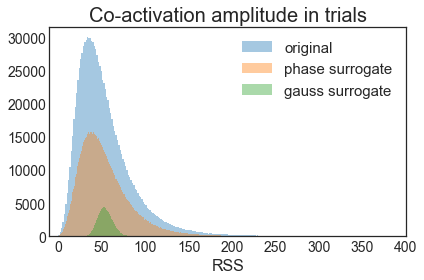

In [349]:
# Histogram of co-activations amplitude in original data and surrogates (pooled)
plt.figure(figsize=(6,4));
plt.title('Co-activation amplitude in trials',fontsize=20)
plt.hist(Edg.flatten(), bins=1000,alpha=0.4,label='original');
plt.hist(Edg_p.flatten(), bins=1000,alpha=0.4,label='phase surrogate');
plt.hist(Edg_g.flatten(), bins=1000,alpha=0.4,label='gauss surrogate');
plt.legend(fontsize=15)
plt.xlim(-10,400)
plt.xlabel('RSS',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

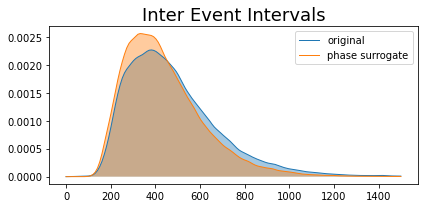

In [636]:
f, ax = plt.subplots(figsize=(6., 3.))

plt.title('Inter Event Intervals', fontsize=18)
density = stats.kde.gaussian_kde(asample)
density_p = stats.kde.gaussian_kde(asample_p)
x = np.linspace(0,1500,150)

plt.plot(x, density(x),c=sns.color_palette()[0],linewidth=1,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.4)
plt.plot(x, density_p(x),c=sns.color_palette()[1],linewidth=1,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.4)
plt.legend()
plt.tight_layout()
#plt.savefig('averanking_distr.pdf')
plt.show()

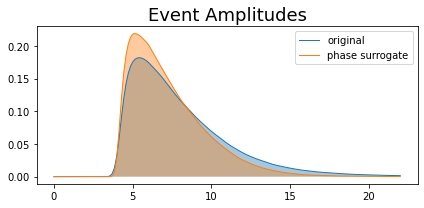

In [637]:
f, ax = plt.subplots(figsize=(6., 3.))

plt.title('Event Amplitudes', fontsize=18)
density = stats.kde.gaussian_kde(sample)
density_p = stats.kde.gaussian_kde(sample_p)
x = np.linspace(0,22, 150)

plt.plot(x, density(x),c=sns.color_palette()[0],linewidth=1,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.4)
plt.plot(x, density_p(x),c=sns.color_palette()[1],linewidth=1,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.4)
plt.legend()
plt.tight_layout()
#plt.savefig('averanking_distr.pdf')
plt.show()

In [ ]:
dfg = pd.DataFrame(
    { 
        'group': ['original']*len(sample)+['surrogate_p']*len(sample_p),
        'distribution': list(sample)+list(sample_p),
        'gr2':  ['original']*len(sample)+['surrogate_p']*len(sample_p),
    }
) 

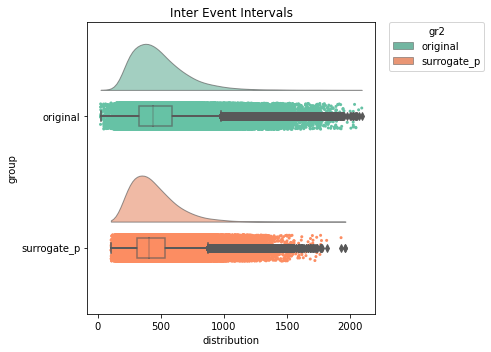

In [619]:
f, ax = plt.subplots(figsize=(7, 5))

dhue = "gr2"; ort="h"; pall = "Set2"

ax=pt.RainCloud( x = 'group', y = 'distribution', hue = dhue, data = dfg, palette = pall, bw = .2,
                 width_viol = .7, ax = ax, orient = ort , alpha = .65)

plt.title("Inter Event Intervals")
plt.tight_layout()
#plt.savefig('IEI_distr.pdf') 
plt.show()

In [ ]:
sample = ea_width[ea_width>0].flatten()
sample_p = ea_width_p[ea_width_p>0].flatten()
dfg = pd.DataFrame(
    { 
        'group': ['original']*len(sample)+['surrogate_p']*len(sample_p),
        'distribution': list(sample)+list(sample_p)
    }
) 

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))

dhue = "gr2"; ort="h"; pall = "Set2"

ax=pt.RainCloud( x = 'group', y = 'distribution', hue = dhue, data = dfg, palette = pall, bw = .2,
                 width_viol = .7, ax = ax, orient = ort , alpha = .65)

plt.title("Event Amplitudes")
plt.tight_layout()
plt.savefig('EA_distr.pdf') 
plt.show()

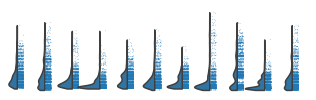

In [411]:
# f, ax = plt.subplots(figsize=(4.5, 1.5))
# ax.set_ylim(0,60)
# ax=pt.half_violinplot( x = 'group', y = 'distribution', data = df, palette = pal, bw = .2, cut = 0.,
#                       scale = "area", width = 1.6, inner = None,orient="h")
# ax=sns.stripplot(x = 'group', y = 'distribution', data = df, palette =pal, edgecolor = "white",
#                  size = 0.6, jitter = 1, zorder = 0)
# ax.axis('off')
# plt.tight_layout()
# plt.savefig('FID_trials_distr.pdf') 
# plt.show()

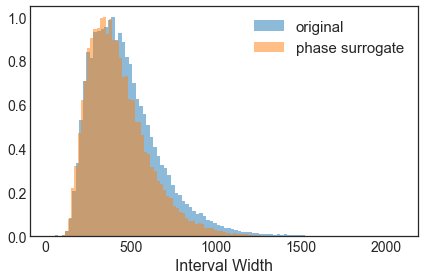

In [655]:
#standardize each column by dividing with the maximum height
fig = plt.figure(figsize=(6, 4))
sample = interval_width[np.where(interval_width>0)].flatten()
bin_height,bin_boundary = np.histogram(sample,bins=100); width = bin_boundary[1]-bin_boundary[0]; bin_height = bin_height/float(max(bin_height))
plt.bar(bin_boundary[:-1],bin_height,width = width,alpha=0.5,label='original')

sample = interval_width_p[np.where(interval_width_p>0)].flatten()
bin_height,bin_boundary = np.histogram(sample,bins=100); width = bin_boundary[1]-bin_boundary[0]; bin_height = bin_height/float(max(bin_height))
plt.bar(bin_boundary[:-1],bin_height,width = width,alpha=0.5,label='phase surrogate')
plt.legend(fontsize=15)
#plt.xlim(-10,400)
plt.xlabel('Interval Width',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

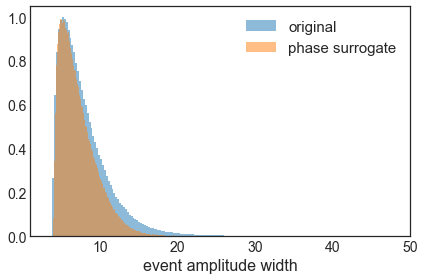

In [662]:
#standardize each column by dividing with the maximum height
fig = plt.figure(figsize=(6, 4))
sample = ea_width[ea_width>0].flatten()
bin_height,bin_boundary = np.histogram(sample,bins=500); width = bin_boundary[1]-bin_boundary[0]; bin_height = bin_height/float(max(bin_height))
plt.bar(bin_boundary[:-1],bin_height,width = width,alpha=0.5,label='original')

sample = ea_width_p[ea_width_p>0].flatten()
bin_height,bin_boundary = np.histogram(sample,bins=500); width = bin_boundary[1]-bin_boundary[0]; bin_height = bin_height/float(max(bin_height))
plt.bar(bin_boundary[:-1],bin_height,width = width,alpha=0.5,label='phase surrogate')
plt.xlim(1,50)
plt.legend(fontsize=15)
plt.xlabel('event amplitude width',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

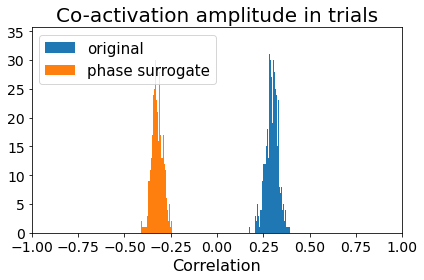

In [1275]:
# Histogram of co-activations amplitude in original data and surrogates (pooled)
plt.figure(figsize=(6,4));
plt.title('Co-activation amplitude in trials',fontsize=20)
plt.hist(rp[:,0], bins=100,label='original');
plt.hist(rp_p[:,0].flatten(), bins=100,label='phase surrogate');
plt.legend(fontsize=15)
plt.xlim(-1,1)
plt.xlabel('Correlation',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

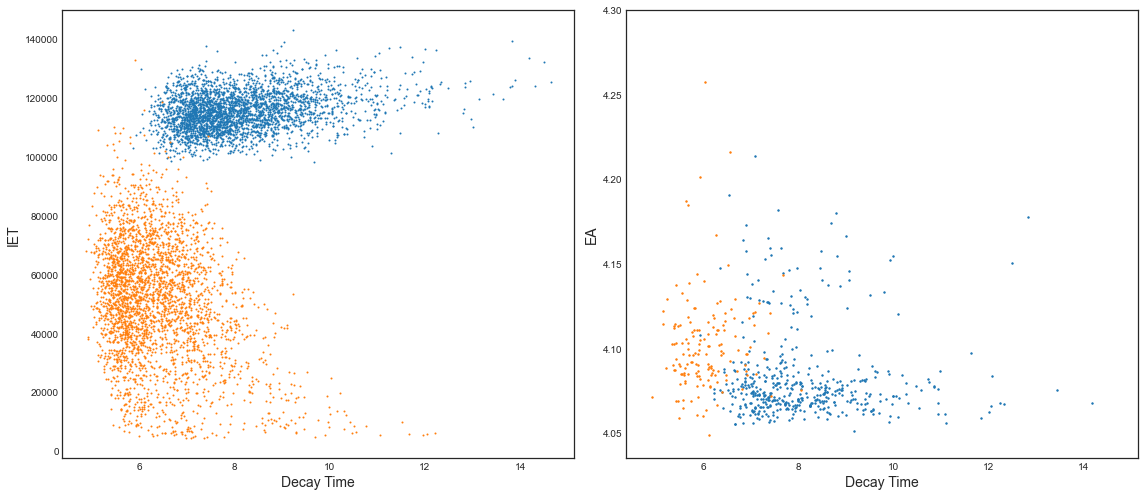

In [679]:
plt.figure(figsize=(16,7))
plt.subplot(121)
plt.scatter(mean_tau,i_width,s=1)
plt.scatter(mean_tau_p,i_width_p,s=1);
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('IET',fontsize=14)
plt.subplot(122)
plt.scatter(mean_tau,a_width,s=2)
plt.scatter(mean_tau_p,a_width_p,s=2);
plt.xlabel('Decay Time',fontsize=14);plt.ylabel('EA',fontsize=14)
plt.ylim(4.035,4.3)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [762]:
np.random.randint(0,3003,100)

array([ 438, 1752, 2997, 1014, 2088, 1172,  678, 1268, 2970,  927, 1350,
       1531, 2219, 2412,  619, 1623,  947, 2268, 2411, 2005,   47, 1369,
       1309, 1393,  725, 2594,  713,  466, 2402, 2045, 2635, 2378,  306,
        895, 1104, 1062, 1950, 1160,  558, 1309, 2529,  370, 2037, 1322,
       1796, 1073, 1798, 2280,  956, 2646, 2079,  514,  104,  633, 2720,
       2288, 2949,  318, 1603, 1355,  273,  275,   43,  875, 1504,  670,
       2989, 1309, 1348,  299, 1839, 1839, 1469, 2654, 1962,  543, 2889,
       2859, 1113, 2271, 1651,  905, 1294, 1796, 1056, 1514,  257, 1303,
        183, 1341, 2346,  891, 1143, 2836, 2194, 1040,  665, 1962, 2129,
        278])

In [687]:
uu, dd=np.histogram(ae,100)

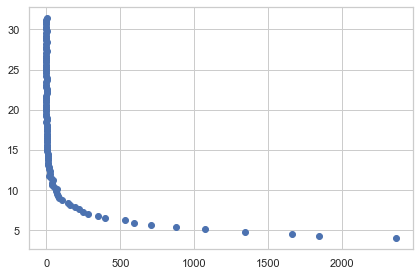

In [756]:
plt.scatter(uu,dd[:-1])
plt.tight_layout()
plt.show()

(array([2.364e+03, 1.845e+03, 1.664e+03, 1.341e+03, 1.072e+03, 8.750e+02,
        7.100e+02, 5.900e+02, 5.290e+02, 3.960e+02, 3.470e+02, 2.840e+02,
        2.480e+02, 2.200e+02, 1.920e+02, 1.570e+02, 1.440e+02, 1.030e+02,
        8.200e+01, 7.800e+01, 7.100e+01, 6.400e+01, 7.000e+01, 5.400e+01,
        3.800e+01, 4.000e+01, 4.200e+01, 3.000e+01, 1.900e+01, 2.300e+01,
        2.700e+01, 1.700e+01, 2.000e+01, 1.300e+01, 1.400e+01, 1.100e+01,
        1.100e+01, 1.100e+01, 8.000e+00, 6.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 5.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 5.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

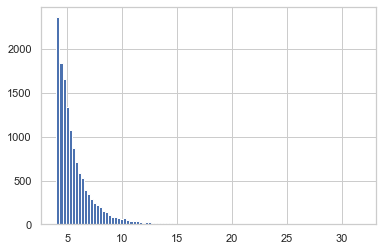

In [757]:
plt.hist(ae,100)

In [ ]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [ ]:
i_width=np.zeros(3003)
i_width_p=np.zeros(3003)
i_width_g=np.zeros(3003)
for k in range(3003):
    
for i in range(44):
    for j in range(10):
        for k in range(3003):
            if len(IET[(i,j,k)][1:-1])>10:
                interval_width[i,j,k]=max(IET[(i,j,k)][1:-1])-min(IET[(i,j,k)][1:-1])
            if len(IET_p[(i,j,k)][1:-1])>10:
                interval_width_p[i,j,k]=max(IET_p[(i,j,k)][1:-1])-min(IET_p[(i,j,k)][1:-1])
            if len(IET_g[(i,j,k)][1:-1])>10:
                interval_width_g[i,j,k]=max(IET_g[(i,j,k)][1:-1])-min(IET_g[(i,j,k)][1:-1])

In [599]:
# i_width=np.zeros(3003)
# i_width_p=np.zeros(3003)
# i_width_g=np.zeros(3003)
# for k in range(3003):
#     ie=[];ie_p=[];ie_g=[]
#     for i in range(44):
#         for j in range(10):
#             if len(IET[(i,j,k)][1:-1])>3:
#                 ie.extend(IET[(i,j,k)])
#             if len(IET_p[(i,j,k)][1:-1])>3:
#                 ie_p.extend(IET_p[(i,j,k)])
#             if len(IET_g[(i,j,k)][1:-1])>3:
#                 ie_g.extend(IET_g[(i,j,k)])
#     i_width[k]=max(ie)-min(ie)
#     i_width_p[k]=max(ie_p)-min(ie_p)
#     i_width[k]=max(ie_g)-min(ie_g)
    

In [617]:
i_width=np.zeros(3003)
i_width_p=np.zeros(3003)
i_width_g=np.zeros(3003)
for k in range(3003):
    ie=[];ie_p=[];ie_g=[]
    for i in range(44):
        for j in range(10):
            if len(IET[(i,j,k)][1:-1])>3:
                ie.extend(IET[(i,j,k)])
            if len(IET_p[(i,j,k)][1:-1])>3:
                ie_p.extend(IET_p[(i,j,k)])
            if len(IET_g[(i,j,k)][1:-1])>3:
                ie_g.extend(IET_g[(i,j,k)])
    i_width[k]=np.var(ie)
    i_width_p[k]=np.var(ie_p)
    i_width[k]=np.var(ie_g)
    

In [583]:
# i_width=np.zeros(3003)
# i_width_p=np.zeros(3003)
# i_width_g=np.zeros(3003)
# for k in range(3003):
#     ie=[];ie_p=[];ie_g=[]
#     for i in range(44):
#         for j in range(10):
#             ie.extend(IET[(i,j,k)])
#             ie_p.extend(IET_p[(i,j,k)])
#             ie_g.extend(IET_g[(i,j,k)])
#     i_width[k]=max(ie)-min(ie)
#     i_width_p[k]=max(ie_p)-min(ie_p)
#     i_width[k]=max(ie_g)-min(ie_g)
    

In [30]:
dfg = pd.DataFrame(
    { 
        '': ['all']*nedges*3,
        'Delay (samples)': list(np.mean(minima_sorted_tau,axis=0))+list(np.mean(minima_sorted_tau_p,axis=0))+list(np.mean(minima_sorted_tau_g,axis=0)),
        'dataset':  ['original']*nedges+['phase surr']*nedges+['gauss surr']*nedges,
    }
) 

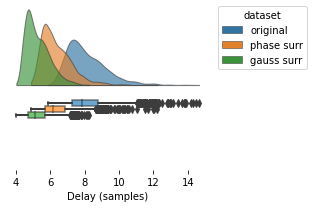

In [31]:
f, ax = plt.subplots(figsize=(4.5, 3))

dhue = "dataset"; ort="h"; pall = sns.color_palette()

ax=pt.RainCloud( x = '', y = 'Delay (samples)', hue = dhue, data = dfg, palette = pall, bw = .18, width_viol = 1.25, ax = ax, orient = ort , alpha = .65, dodge = True,point_size=0.)

# ax=pt.RainCloud( x = '', y = 'Delay (samples)', hue = dhue, data = dfg, palette = pall, bw = .18,
#                  width_viol = 1.25, ax = ax, orient = ort , alpha = .65, dodge = True,point_size=0.)

# ax=pt.half_violinplot(x = 'Delay (samples)', y = '', hue = dhue, data = dfg, palette = pall, bw = .2, cut = 0.,scale = "area", width = 1., inner = None)

ax.set_frame_on(False)
ax.set_yticks([])

plt.tight_layout()
#plt.savefig('FID_distr.pdf') 
plt.show()

In [32]:
#correlation values of edges
corre=np.zeros((44,10,3003))
corre_p=np.zeros((44,10,3003))
corre_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        corre[i,j,:]=np.mean(edg,axis=0)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        corre_p[i,j,:]=np.mean(edg,axis=0)
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        corre_g[i,j,:]=np.mean(edg,axis=0)

In [41]:
#correlation values of edges
vare=np.zeros((44,10,3003))
vare_p=np.zeros((44,10,3003))
vare_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        vare[i,j,:]=np.var(edg,axis=0)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        vare_p[i,j,:]=np.var(edg,axis=0)
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        vare_g[i,j,:]=np.var(edg,axis=0)

In [286]:
#correlation values of edges
grade=np.zeros((44,10,3003))
grade_p=np.zeros((44,10,3003))
grade_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        grade[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        grade_p[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        grade_g[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)

In [475]:
#correlation values of edges
upgrade=np.zeros((44,10,3003))
upgrade_p=np.zeros((44,10,3003))
upgrade_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        edg=np.where(edg>0,edg,0)
        upgrade[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        edg=np.where(edg>0,edg,0)
        upgrade_p[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        edg=np.where(edg>0,edg,0)
        upgrade_g[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)

In [476]:
#correlation values of edges
dgrade=np.zeros((44,10,3003))
dgrade_p=np.zeros((44,10,3003))
dgrade_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        edg=np.where(edg<0,edg,0)
        dgrade[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        edg=np.where(edg<0,edg,0)
        dgrade_p[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        edg=np.where(edg<0,edg,0)
        dgrade_g[i,j,:]=np.mean(np.gradient(edg,axis=0),axis=0)

In [380]:
#correlation values of edges
abrade=np.zeros((44,10,3003))
abrade_p=np.zeros((44,10,3003))
abrade_g=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        abrade[i,j,:]=np.mean(np.abs(np.gradient(edg,axis=0)),axis=0)
        edg=analysis.go_edge(Trials_p['%d'%i][j])
        abrade_p[i,j,:]=np.mean(np.abs(np.gradient(edg,axis=0)),axis=0)
        edg=analysis.go_edge(Trials_g['%d'%i][j])
        abrade_g[i,j,:]=np.mean(np.abs(np.gradient(edg,axis=0)),axis=0)

In [370]:
#correlation values of edges
sgrade=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        edg=analysis.go_edge(Trials['%d'%i][j])
        sgrade[i,j,:]=np.mean(np.gradient(edg[:1000],axis=0),axis=0)

In [376]:
#correlation values of edges
arade=np.zeros((44,10,3003))
for i in range(44):
    for j in range(10):
        for ie in range(3003):
            r1=np.gradient(stats.zscore(Trials['%d'%i][j][:,dice['%d'%ie][0]]),axis=0)
            r2=np.gradient(stats.zscore(Trials['%d'%i][j][:,dice['%d'%ie][1]]),axis=0)
            arade[i,j,ie]=np.mean(r1*r2)

In [377]:
mg=np.mean(np.mean(grade,axis=1),axis=0)
ma=np.mean(np.mean(arade,axis=1),axis=0)
ms=np.mean(np.mean(sgrade,axis=1),axis=0)

In [ ]:
AAL.drawgraph(AAL.SC,weigh)

In [194]:
AAL.Neword_lab

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 21, 22,
       23, 24, 25, 26, 27, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 60, 61, 62, 63, 64, 65, 66])

In [201]:
np.asarray(AAL.SC_lab)[:int(len(AAL.SC_lab)/2)]

array(['Rectus_L', 'Olfactory_L', 'Frontal_Sup_Orb_L',
       'Frontal_Med_Orb_L', 'Frontal_Mid_Orb_L', 'Frontal_Inf_Orb_L',
       'Frontal_Sup_L', 'Frontal_Mid_L', 'Frontal_Inf_Oper_L',
       'Frontal_Inf_Tri_L', 'Frontal_Sup_Medial_L', 'Supp_Motor_Area_L',
       'Paracentral_Lobule_L', 'Precentral_L', 'Rolandic_Oper_L',
       'Postcentral_L', 'Parietal_Sup_L', 'Parietal_Inf_L',
       'SupraMarginal_L', 'Angular_L', 'Precuneus_L', 'Occipital_Sup_L',
       'Occipital_Mid_L', 'Occipital_Inf_L', 'Calcarine_L', 'Cuneus_L',
       'Lingual_L', 'Fusiform_L', 'Heschl_L', 'Temporal_Sup_L',
       'Temporal_Mid_L', 'Temporal_Inf_L', 'Temporal_Pole_Sup_L',
       'Temporal_Pole_Mid_L', 'ParaHippocampal_L', 'Cingulum_Ant_L',
       'Cingulum_Mid_L', 'Cingulum_Post_L', 'Insula_L'], dtype='<U20')

In [203]:
np.arange(28,35)

array([28, 29, 30, 31, 32, 33, 34])

In [214]:
np.asarray(AAL.SC_lab)[Ordine2021]

array(['Rectus_L', 'Olfactory_L', 'Frontal_Sup_Orb_L',
       'Frontal_Med_Orb_L', 'Frontal_Mid_Orb_L', 'Frontal_Inf_Orb_L',
       'Frontal_Sup_L', 'Frontal_Mid_L', 'Frontal_Inf_Oper_L',
       'Frontal_Inf_Tri_L', 'Frontal_Sup_Medial_L', 'Supp_Motor_Area_L',
       'Paracentral_Lobule_L', 'Precentral_L', 'Rolandic_Oper_L',
       'Postcentral_L', 'Parietal_Sup_L', 'Parietal_Inf_L',
       'SupraMarginal_L', 'Angular_L', 'Precuneus_L', 'Heschl_L',
       'Temporal_Sup_L', 'Temporal_Mid_L', 'Temporal_Inf_L',
       'Temporal_Pole_Sup_L', 'Temporal_Pole_Mid_L', 'ParaHippocampal_L',
       'Fusiform_L', 'Cingulum_Ant_L', 'Cingulum_Mid_L',
       'Cingulum_Post_L', 'Insula_L', 'Occipital_Sup_L',
       'Occipital_Mid_L', 'Occipital_Inf_L', 'Calcarine_L', 'Cuneus_L',
       'Lingual_L', 'Rectus_R', 'Olfactory_R', 'Frontal_Sup_Orb_R',
       'Frontal_Med_Orb_R', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Orb_R',
       'Frontal_Sup_R', 'Frontal_Mid_R', 'Frontal_Inf_Oper_R',
       'Frontal_Inf_Tri_R

In [209]:
Ordine2021+39

array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 67, 68, 69, 70, 71, 72, 73, 66, 74, 75, 76, 77, 60,
       61, 62, 63, 64, 65])

In [438]:
EminimaNew=MiniMat_circle[np.triu_indices(78, 1)]

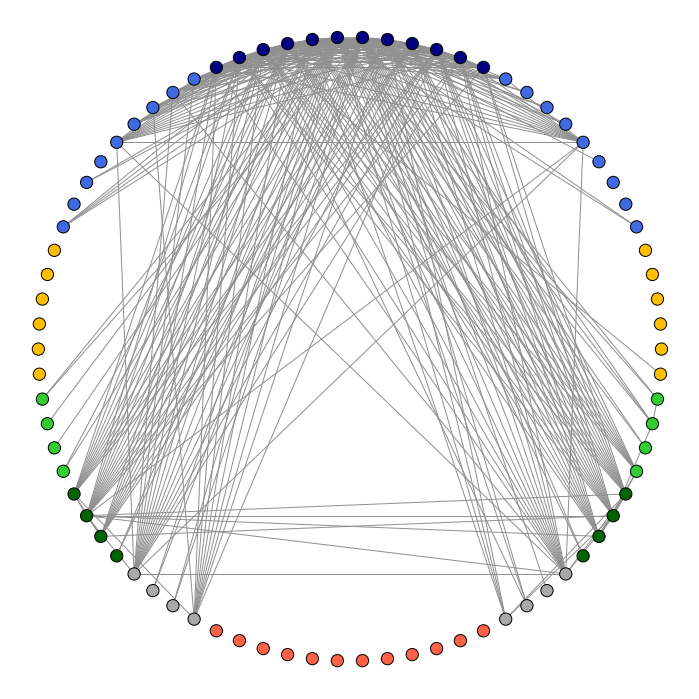

In [446]:
weigh=np.zeros(nedges);weigh[np.where(EminimaNew>np.percentile(EminimaNew,90))]=1
AAL.drawgraph(AAL.SC, weigh)

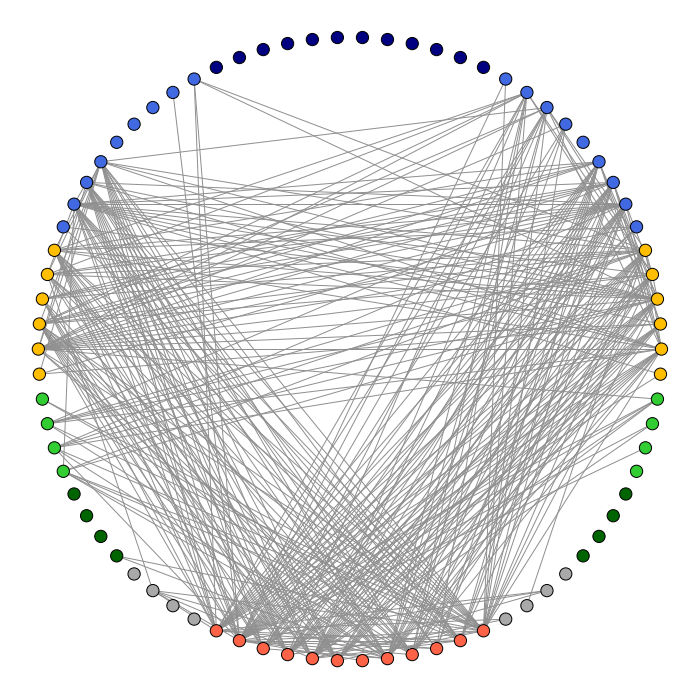

In [447]:
weigh=np.zeros(nedges);weigh[np.where(EminimaNew<np.percentile(EminimaNew,10))]=1
AAL.drawgraph(AAL.SC, weigh)

In [597]:
boot_decay_iet=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_iet[i,0],boot_decay_iet[i,1]=stats.pearsonr(mean_tau[orde],i_width[orde])
boot_decay_iet_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_iet_p[i,0],boot_decay_iet_p[i,1]=stats.pearsonr(mean_tau_p[orde],i_width_p[orde])
boot_decay_iet_g=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    boot_decay_iet_g[i,0],boot_decay_iet_g[i,1]=stats.pearsonr(mean_tau_g[orde],i_width_g[orde])

In [598]:
stats.pearsonr(mean_tau_p,i_width_p)

(-0.21980274810791953, 3.537665802535666e-34)

In [599]:
stats.pearsonr(mean_tau_g,i_width_g)

(-0.09856661524201812, 6.220318639199727e-08)

In [600]:
stats.pearsonr(mean_tau,i_width)

(-0.22611479544097335, 4.040333161628573e-36)

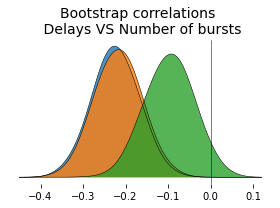

In [606]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Bootstrap correlations \n Delays VS Number of bursts', fontsize=14)
density = stats.kde.gaussian_kde(boot_decay_iet[:,0],0.5)
density_p = stats.kde.gaussian_kde(boot_decay_iet_p[:,0],0.5)
density_g = stats.kde.gaussian_kde(boot_decay_iet_g[:,0],0.5)
x = np.linspace(-0.45,0.12,150)

plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.8)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='Gauss surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.8)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.axvline(0,c='k',linewidth=0.5)
plt.tight_layout()
#plt.savefig('boot-DelayBursts.pdf')
plt.show()

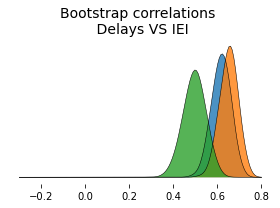

In [528]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Bootstrap correlations \n Delays VS IEI', fontsize=14)
density = stats.kde.gaussian_kde(boot_decay_iet[:,0],0.5)
density_p = stats.kde.gaussian_kde(boot_decay_iet_p[:,0],0.5)
density_g = stats.kde.gaussian_kde(boot_decay_iet_g[:,0],0.5)
x = np.linspace(-0.3,0.8,150)

plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.8)
plt.plot(x, density_g(x),c='k',linewidth=0.5,label='Gauss surrogate')
plt.fill_between(x, density_g(x), facecolor=sns.color_palette()[2], alpha=0.8)
ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
plt.savefig('boot-delayIEI.pdf')
plt.show()

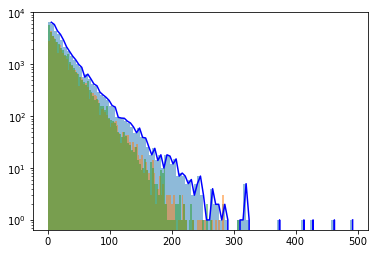

In [485]:
plt.figure()
plt.hist(ie,100,alpha=0.5)
plt.plot(bins[1:],counts,'b')
plt.hist(ie_p,100,alpha=0.5)
plt.hist(ie_g,100,alpha=0.5)

plt.yscale('log')
plt.show()

In [534]:
len(ie_p)

36219

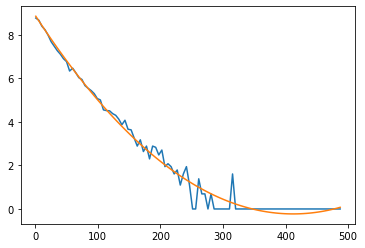

In [506]:
plt.plot(bins[:-1],np.log(np.where(counts==0,1,counts)))
plt.plot(bins[:-1],z[0]*bins[:-1]**2+z[1]*bins[:-1]+z[2])

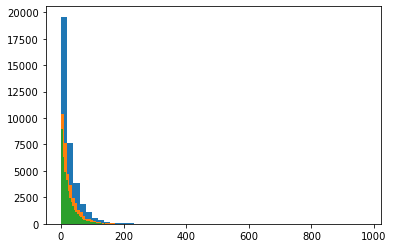

In [558]:
counts, bins, bars = plt.hist(ie,50);
counts_p, bins_p, bars = plt.hist(ie_p,50);
counts_g, bins_g, bars = plt.hist(ie_g,50);

In [559]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, bins[:-1], counts/np.max(counts))
popt_p, pcov = curve_fit(func, bins_p[:-1], counts_p/np.max(counts_p))
popt_g, pcov = curve_fit(func, bins_g[:-1], counts_g/np.max(counts_g))

popt[1]

/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0.04389444886882088

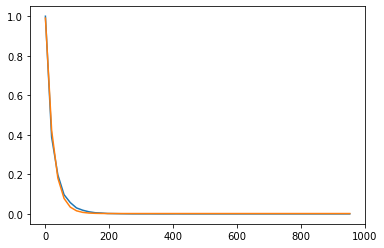

In [557]:
plt.plot(bins[:-1],counts/np.max(counts))
plt.plot(bins[:-1],func(bins[:-1],popt[0],popt[1],popt[2]))

plt.plot(bins_p[:-1],counts/np.max(counts))
plt.plot(bins[:-1],func(bins[:-1],popt[0],popt[1],popt[2]))

plt.plot(bins[:-1],counts/np.max(counts))
plt.plot(bins[:-1],func(bins[:-1],popt[0],popt[1],popt[2]))

In [81]:
dboot_r=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    dboot_r[i,0],dboot_r[i,1]=stats.pearsonr(mean_tau[orde],md[orde])
dboot_r_p=np.zeros((2000,2))
for i in range(2000):
    orde=np.random.randint(0,3003,400)
    dboot_r_p[i,0],dboot_r_p[i,1]=stats.pearsonr(mean_tau[orde],md_p[orde])

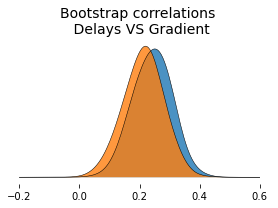

In [82]:
f, ax = plt.subplots(figsize=(4., 3.))

plt.title('Bootstrap correlations \n Delays VS Gradient', fontsize=14)
density = stats.kde.gaussian_kde(dboot_r[:,0],0.5)
density_p = stats.kde.gaussian_kde(dboot_r_p[:,0],0.5)
x = np.linspace(-0.2,0.6,150)

plt.plot(x, density(x),c='k',linewidth=0.5,label='original')
plt.fill_between(x, density(x), facecolor=sns.color_palette()[0], alpha=0.8)
plt.plot(x, density_p(x),c='k',linewidth=0.5,label='phase surrogate')
plt.fill_between(x, density_p(x), facecolor=sns.color_palette()[1], alpha=0.8)

ax.set_frame_on(False)
plt.yticks([])
#plt.legend();
plt.tight_layout()
plt.show()

In [531]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, bins[:-1], counts)

popt[1]

/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0.04241857619290195

In [ ]:
pcov

In [512]:
popt[1]

0.042627374136811634

In [504]:
z = np.polyfit(bins[np.where(counts!=0)],np.log(np.where(counts==0,1,counts))[np.where(counts!=0)], 2)
z

array([ 5.37756853e-05, -4.43165932e-02,  8.90260212e+00])

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 62, 63, 64, 65, 75, 83, 86, 93, 99]),)]

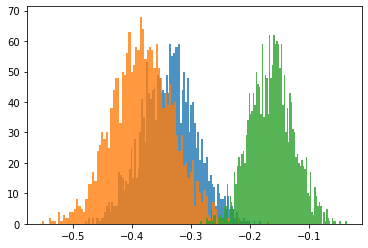

In [191]:
plt.figure()
plt.hist(boot_decay_iet[:,0],100,alpha=0.8)
plt.hist(boot_decay_iet_p[:,0],100,alpha=0.8)
plt.hist(boot_decay_iet_g[:,0],100,alpha=0.8)
plt.show()

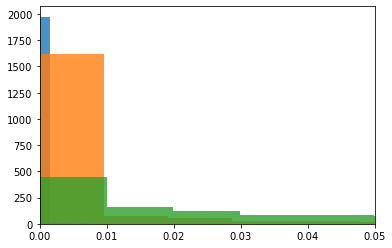

In [88]:
plt.figure()
plt.hist(boot_decay_iet[:,1],100,alpha=0.8)
plt.hist(boot_decay_iet_p[:,1],100,alpha=0.8)
plt.hist(boot_decay_iet_g[:,1],100,alpha=0.8)
plt.xlim(0.,0.05)
plt.show()

In [ ]:
def go_edge(tseries):
    nregions=tseries.shape[1]
    Blen=tseries.shape[0]
    nedges=int(nregions**2/2-nregions/2)
    iTriup= np.triu_indices(nregions,k=1) 
    gz=stats.zscore(tseries)
    Eseries = gz[:,iTriup[0]]*gz[:,iTriup[1]]
    return Eseries

In [149]:
iTriup= np.triu_indices(nregions,k=1) 

In [268]:
gis=stats.zscore(Trials['20'][0])

In [170]:
iTriup[0]

array([ 0,  0,  0, ..., 75, 75, 76])

In [171]:
iTriup[1]

array([ 1,  2,  3, ..., 76, 77, 77])

In [173]:
(gis[:,iTriup[0]]*gis[:,iTriup[1]])[0]

array([ 0.04215428, -0.04421567, -0.04239539, ...,  0.20749003,
        0.07881905,  0.10728454])

In [175]:
gis[:,0]*gis[:,1]

array([ 0.04215428, -0.01596783,  0.06055451, ...,  2.83752314,
        1.75175798,  0.57606959])

In [165]:
analysis.go_edge(Trials['0'][0])

array([[ 4.21542815e-02, -4.42156717e-02, -4.23953892e-02, ...,
         2.07490032e-01,  7.88190543e-02,  1.07284543e-01],
       [-1.59678283e-02,  5.83739228e-04, -2.85979005e-02, ...,
         6.47886589e-02,  2.28630989e-02,  1.20679800e-02],
       [ 6.05545064e-02, -1.02628707e-01, -1.86377744e-01, ...,
         1.34956292e-04, -1.01358883e-02, -2.29333873e-05],
       ...,
       [ 2.83752314e+00,  9.10127743e-01,  2.47091276e+00, ...,
         4.08654147e+00,  4.41905609e+00,  3.64110449e+00],
       [ 1.75175798e+00,  8.08417441e-01,  1.66957624e+00, ...,
         2.72687436e+00,  3.10440796e+00,  2.29911513e+00],
       [ 5.76069592e-01,  8.81407114e-01,  1.10544895e+00, ...,
         6.43455526e-01,  1.20817550e+00,  5.46296488e-01]])

In [164]:
Trials[''][0].shape

(2560, 78)

/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

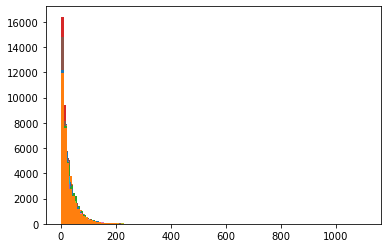

In [515]:
# i_width=np.zeros(3003)
# i_width_p=np.zeros(3003)
# i_width_g=np.zeros(3003)
# for k in range(3003):
#     ie=[];ie_p=[];ie_g=[]  
#     for i in range(44):
#         for j in range(10):
#             if len(IET[(i,j,k)][1:-1])>3:
#                 ie.extend(IET[(i,j,k)])
#             if len(IET_p[(i,j,k)][1:-1])>3:
#                 ie_p.extend(IET_p[(i,j,k)])
#             if len(IET_g[(i,j,k)][1:-1])>3:
#                 ie_g.extend(IET_g[(i,j,k)])
#     counts, bins, bars = plt.hist(ie,100);
#     popt, pcov = curve_fit(func, bins[:-1], counts)
#     i_width[k]=popt[1]
#     counts, bins, bars = plt.hist(ie_p,100);
#     popt, pcov = curve_fit(func, bins[:-1], counts)
#     i_width_p[k]=popt[1]
#     counts, bins, bars = plt.hist(ie_g,100);
#     popt, pcov = curve_fit(func, bins[:-1], counts)
#     i_width_g[k]=popt[1]